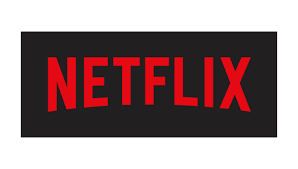

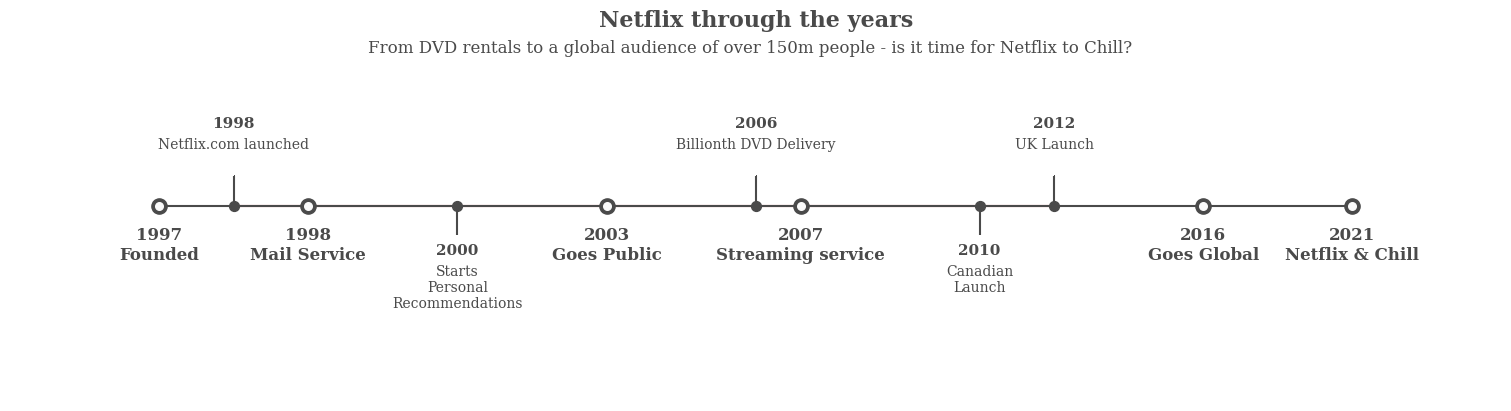

In [ ]:
#@title Netflix Timeline

import matplotlib.pyplot as plt
import numpy as np

# these go on the numbers below
tl_dates = [
    "1997\nFounded",
    "1998\nMail Service",
    "2003\nGoes Public",
    "2007\nStreaming service",
    "2016\nGoes Global",
    "2021\nNetflix & Chill"
]

tl_x = [1, 2, 4, 5.3, 8, 9]

# these go on the numbers
tl_sub_x = [1.5, 3, 5, 6.5, 7]

tl_sub_times = [
    "1998", "2000", "2006", "2010", "2012"
]

tl_text = [
    "Netflix.com launched",
    "Starts\nPersonal\nRecommendations", "Billionth DVD Delivery", "Canadian\nLaunch", "UK Launch"
]

# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)

# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.9, c='#4a4a4a', zorder=1)

# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a', zorder=4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center',
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a', fontsize=12)

# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels)
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x) + 1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3 * (idx % 2) - 0.5, time, ha='center',
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a', fontsize=11)

    ax.text(x, 1.3 * (idx % 2) - 0.6, txt, va='top', ha='center',
            fontfamily='serif', color='#4a4a4a')

# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks
ax.set_xticks([])
ax.set_yticks([])

# Title
ax.set_title("Netflix through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')
ax.text(2.4, 1.57, "From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill?", fontfamily='serif', fontsize=12, color='#4a4a4a')

plt.show()

In [ ]:
import polars as pl
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
sns.set_style('whitegrid')

In [ ]:
df = pl.read_csv("netflix.csv")

In [ ]:
df.head()

shape: (5, 12)
┌─────────┬─────────┬─────────────┬─────────────┬───┬────────┬───────────┬────────────┬────────────┐
│ show_id ┆ type    ┆ title       ┆ director    ┆ … ┆ rating ┆ duration  ┆ listed_in  ┆ descriptio │
│ ---     ┆ ---     ┆ ---         ┆ ---         ┆   ┆ ---    ┆ ---       ┆ ---        ┆ n          │
│ str     ┆ str     ┆ str         ┆ str         ┆   ┆ str    ┆ str       ┆ str        ┆ ---        │
│         ┆         ┆             ┆             ┆   ┆        ┆           ┆            ┆ str        │
╞═════════╪═════════╪═════════════╪═════════════╪═══╪════════╪═══════════╪════════════╪════════════╡
│ s1      ┆ Movie   ┆ Dick        ┆ Kirsten     ┆ … ┆ PG-13  ┆ 90 min    ┆ Documentar ┆ As her     │
│         ┆         ┆ Johnson Is  ┆ Johnson     ┆   ┆        ┆           ┆ ies        ┆ father     │
│         ┆         ┆ Dead        ┆             ┆   ┆        ┆           ┆            ┆ nears the  │
│         ┆         ┆             ┆             ┆   ┆        ┆           ┆            ┆ end of…    │
│ s2      ┆ TV Show ┆ Blood &     ┆ null        ┆ … ┆ TV-MA  ┆ 2 Seasons ┆ Internatio ┆ After      │
│         ┆         ┆ Water       ┆             ┆   ┆        ┆           ┆ nal TV     ┆ crossing   │
│         ┆         ┆             ┆             ┆   ┆        ┆           ┆ Shows, TV  ┆ paths at a │
│         ┆         ┆             ┆             ┆   ┆        ┆           ┆ Dra…       ┆ part…      │
│ s3      ┆ TV Show ┆ Ganglands   ┆ Julien      ┆ … ┆ TV-MA  ┆ 1 Season  ┆ Crime TV   ┆ To protect │
│         ┆         ┆             ┆ Leclercq    ┆   ┆        ┆           ┆ Shows, Int ┆ his family │
│         ┆         ┆             ┆             ┆   ┆        ┆           ┆ ernational ┆ from a p…  │
│         ┆         ┆             ┆             ┆   ┆        ┆           ┆ …          ┆            │
│ s4      ┆ TV Show ┆ Jailbirds   ┆ null        ┆ … ┆ TV-MA  ┆ 1 Season  ┆ Docuseries ┆ Feuds, fli │
│         ┆         ┆ New Orleans ┆             ┆   ┆        ┆           ┆ , Reality  ┆ rtations   │
│         ┆         ┆             ┆             ┆   ┆        ┆           ┆ TV         ┆ and toilet │
│         ┆         ┆             ┆             ┆   ┆        ┆           ┆            ┆ …          │
│ s5      ┆ TV Show ┆ Kota        ┆ null        ┆ … ┆ TV-MA  ┆ 2 Seasons ┆ Internatio ┆ In a city  │
│         ┆         ┆ Factory     ┆             ┆   ┆        ┆           ┆ nal TV     ┆ of         │
│         ┆         ┆             ┆             ┆   ┆        ┆           ┆ Shows,     ┆ coaching   │
│         ┆         ┆             ┆             ┆   ┆        ┆           ┆ Romant…    ┆ centers …  │
└─────────┴─────────┴─────────────┴─────────────┴───┴────────┴───────────┴────────────┴────────────┘

In [ ]:
print(df.schema)
print(df.shape)

Schema([('show_id', String), ('type', String), ('title', String), ('director', String), ('cast', String), ('country', String), ('date_added', String), ('release_year', Int64), ('rating', String), ('duration', String), ('listed_in', String), ('description', String)])
(8807, 12)


In [ ]:
df.describe()

shape: (9, 13)
┌────────────┬─────────┬─────────┬─────────────┬───┬────────┬──────────┬─────────────┬─────────────┐
│ statistic  ┆ show_id ┆ type    ┆ title       ┆ … ┆ rating ┆ duration ┆ listed_in   ┆ description │
│ ---        ┆ ---     ┆ ---     ┆ ---         ┆   ┆ ---    ┆ ---      ┆ ---         ┆ ---         │
│ str        ┆ str     ┆ str     ┆ str         ┆   ┆ str    ┆ str      ┆ str         ┆ str         │
╞════════════╪═════════╪═════════╪═════════════╪═══╪════════╪══════════╪═════════════╪═════════════╡
│ count      ┆ 8807    ┆ 8807    ┆ 8807        ┆ … ┆ 8803   ┆ 8804     ┆ 8807        ┆ 8807        │
│ null_count ┆ 0       ┆ 0       ┆ 0           ┆ … ┆ 4      ┆ 3        ┆ 0           ┆ 0           │
│ mean       ┆ null    ┆ null    ┆ null        ┆ … ┆ null   ┆ null     ┆ null        ┆ null        │
│ std        ┆ null    ┆ null    ┆ null        ┆ … ┆ null   ┆ null     ┆ null        ┆ null        │
│ min        ┆ s1      ┆ Movie   ┆ #Alive      ┆ … ┆ 66 min ┆ 1 Season ┆ Action &    ┆ "Bridgerton │
│            ┆         ┆         ┆             ┆   ┆        ┆          ┆ Adventure   ┆ " cast      │
│            ┆         ┆         ┆             ┆   ┆        ┆          ┆             ┆ members     │
│            ┆         ┆         ┆             ┆   ┆        ┆          ┆             ┆ shar…       │
│ 25%        ┆ null    ┆ null    ┆ null        ┆ … ┆ null   ┆ null     ┆ null        ┆ null        │
│ 50%        ┆ null    ┆ null    ┆ null        ┆ … ┆ null   ┆ null     ┆ null        ┆ null        │
│ 75%        ┆ null    ┆ null    ┆ null        ┆ … ┆ null   ┆ null     ┆ null        ┆ null        │
│ max        ┆ s999    ┆ TV Show ┆ 최강전사    ┆ … ┆ UR     ┆ 99 min   ┆ Thrillers   ┆ “Last       │
│            ┆         ┆         ┆ 미니특공대  ┆   ┆        ┆          ┆             ┆ Chance U”   │
│            ┆         ┆         ┆ : 영웅의    ┆   ┆        ┆          ┆             ┆ hits the    │
│            ┆         ┆         ┆ 탄생        ┆   ┆        ┆          ┆             ┆ hardw…      │
└────────────┴─────────┴─────────┴─────────────┴───┴────────┴──────────┴─────────────┴─────────────┘

### **Attribute Information**

1. show_id : Unique ID for every Movie / TV Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / TV Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : Content Rating of the movie / show

10. duration : Total Duration - in minutes (movies) or number of seasons (TV shows)

11. listed_in : Genre

12. description: The Summary description

In [ ]:
df = df.rename({
    "director": "Director",
    "country": "Country",
    "cast": "Cast",
    "date_added": "Date_Added",
    "rating": "Rating",
    "duration": "Duration",
    "show_id": "Show_ID",
    "type": "Video_Type",
    "title": "Title",
    "release_year": "Year_Release",
    "listed_in": "Genres",
    "description": "Description"
})

print(df.columns)

['Show_ID', 'Video_Type', 'Title', 'Director', 'Cast', 'Country', 'Date_Added', 'Year_Release', 'Rating', 'Duration', 'Genres', 'Description']


In [ ]:
unique_video_types = df.select("Video_Type").unique().to_series()

for video_type in unique_video_types:
    print(video_type)

Movie
TV Show


In [ ]:
df.select("Rating").unique()["Rating"].to_list()

['TV-14',
 '74 min',
 'TV-G',
 'TV-Y7',
 'TV-MA',
 None,
 'TV-Y',
 'PG-13',
 'R',
 'TV-Y7-FV',
 'G',
 'UR',
 'PG',
 'NC-17',
 'TV-PG',
 '66 min',
 '84 min',
 'NR']

These values are different content ratings typically assigned to movies and TV shows to indicate the appropriate audience based on age and content suitability.

- **PG-13**: Parents Strongly Cautioned – Some material may be inappropriate for children under 13.
- **TV-MA**: Mature Audience Only – Specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.
- **PG**: Parental Guidance Suggested – Some material may not be suitable for children.
- **TV-14**: Parents Strongly Cautioned – This program contains some material that many parents would find unsuitable for children under 14 years of age.
- **TV-PG**: Parental Guidance Suggested – This program contains material that parents may find unsuitable for younger children.
- **TV-Y**: All Children – This program is designed to be appropriate for all children.
- **TV-Y7**: Directed to Older Children – This program is designed for children age 7 and above.
- **R**: Restricted – Restricted to viewers over 17 or 18 years old.
- **TV-G**: General Audience – Most parents would find this program suitable for all ages.
- **G**: General Audience – All ages admitted.
- **NC-17**: Adults Only – No one 17 and under admitted.
- **NR**: Not Rated – This movie has not been rated by the MPAA.
- **TV-Y7-FV**: Directed to Older Children - Fantasy Violence – This program is designed for children age 7 and above and contains fantasy violence.
- **UR**: Unrated – This movie has not been submitted for a rating.

Note that '74 min', '84 min', '66 min', and nan are invalid data, which will be handled at the preprocessing stage

In [ ]:
count_duplicated = df.is_duplicated().sum()

print(f'The dataset has {count_duplicated} duplicated values')

The dataset has 0 duplicated values


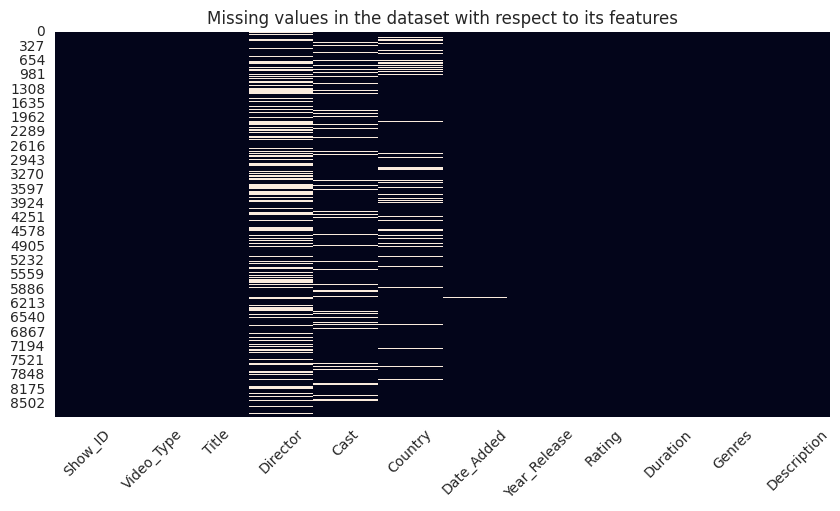

In [ ]:
df_pd = df.to_pandas()
plotnan = df_pd.isna()

plt.figure(figsize=(10, 5))
sns.heatmap(plotnan, cbar=False)
plt.title('Missing values in the dataset with respect to its features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
null_counts = df.null_count()

null_counts_list = [null_counts[col][0] for col in df.columns]

total_rows = df.height

null_df = pl.DataFrame({
    "columns": df.columns,
    "number_of_null_values": null_counts_list,
    "percentage_null_values": [round(count * 100 / total_rows, 2) for count in null_counts_list]
})

with pl.Config(set_tbl_rows=-1, set_tbl_formatting="UTF8_FULL_CONDENSED"):
  print(null_df.sort("percentage_null_values", descending=True))


shape: (12, 3)
┌──────────────┬───────────────────────┬────────────────────────┐
│ columns      ┆ number_of_null_values ┆ percentage_null_values │
│ ---          ┆ ---                   ┆ ---                    │
│ str          ┆ i64                   ┆ f64                    │
╞══════════════╪═══════════════════════╪════════════════════════╡
│ Director     ┆ 2634                  ┆ 29.91                  │
│ Country      ┆ 831                   ┆ 9.44                   │
│ Cast         ┆ 825                   ┆ 9.37                   │
│ Date_Added   ┆ 10                    ┆ 0.11                   │
│ Rating       ┆ 4                     ┆ 0.05                   │
│ Duration     ┆ 3                     ┆ 0.03                   │
│ Show_ID      ┆ 0                     ┆ 0.0                    │
│ Video_Type   ┆ 0                     ┆ 0.0                    │
│ Title        ┆ 0                     ┆ 0.0                    │
│ Year_Release ┆ 0                     ┆ 0.0                 

In [ ]:
with pl.Config(set_tbl_cols=-1,set_tbl_formatting="UTF8_FULL_CONDENSED", set_tbl_width_chars=-1):
  print(df.filter(pl.col("Duration").is_null()))

shape: (3, 12)
┌─────────┬────────────┬─────────────────────────────────┬────────────┬────────────┬───────────────┬────────────────────┬──────────────┬────────┬──────────┬────────┬─────────────────────────────────┐
│ Show_ID ┆ Video_Type ┆ Title                           ┆ Director   ┆ Cast       ┆ Country       ┆ Date_Added         ┆ Year_Release ┆ Rating ┆ Duration ┆ Genres ┆ Description                     │
│ ---     ┆ ---        ┆ ---                             ┆ ---        ┆ ---        ┆ ---           ┆ ---                ┆ ---          ┆ ---    ┆ ---      ┆ ---    ┆ ---                             │
│ str     ┆ str        ┆ str                             ┆ str        ┆ str        ┆ str           ┆ str                ┆ i64          ┆ str    ┆ str      ┆ str    ┆ str                             │
╞═════════╪════════════╪═════════════════════════════════╪════════════╪════════════╪═══════════════╪════════════════════╪══════════════╪════════╪══════════╪════════╪════════════════════

In [ ]:
duration_dict = {
    's5542': '74 min',
    's5795': '84 min',
    's5814': '66 min'
}

df = df.with_columns(
    pl.coalesce([
        pl.col("Show_ID").replace_strict(duration_dict, default=None),
        pl.col("Duration")
    ]).alias("Duration")
)

with pl.Config(set_tbl_cols=-1,set_tbl_formatting="UTF8_FULL_CONDENSED", set_tbl_width_chars=-1):
  print(df.null_count())

shape: (1, 12)
┌─────────┬────────────┬───────┬──────────┬──────┬─────────┬────────────┬──────────────┬────────┬──────────┬────────┬─────────────┐
│ Show_ID ┆ Video_Type ┆ Title ┆ Director ┆ Cast ┆ Country ┆ Date_Added ┆ Year_Release ┆ Rating ┆ Duration ┆ Genres ┆ Description │
│ ---     ┆ ---        ┆ ---   ┆ ---      ┆ ---  ┆ ---     ┆ ---        ┆ ---          ┆ ---    ┆ ---      ┆ ---    ┆ ---         │
│ u32     ┆ u32        ┆ u32   ┆ u32      ┆ u32  ┆ u32     ┆ u32        ┆ u32          ┆ u32    ┆ u32      ┆ u32    ┆ u32         │
╞═════════╪════════════╪═══════╪══════════╪══════╪═════════╪════════════╪══════════════╪════════╪══════════╪════════╪═════════════╡
│ 0       ┆ 0          ┆ 0     ┆ 2634     ┆ 825  ┆ 831     ┆ 10         ┆ 0            ┆ 4      ┆ 0        ┆ 0      ┆ 0           │
└─────────┴────────────┴───────┴──────────┴──────┴─────────┴────────────┴──────────────┴────────┴──────────┴────────┴─────────────┘


We can replace the missing values in Duration with the actual values since there are only few missing.

Source:

https://www.netflix.com/my-en/title/80161109

https://www.netflix.com/my-en/title/70129452

https://www.netflix.com/my-en/title/80114111

In [ ]:
with pl.Config(set_tbl_cols=-1,set_tbl_formatting="UTF8_FULL_CONDENSED", set_tbl_width_chars=-1):
  print(df.filter(pl.col("Rating").is_null()))

shape: (4, 12)
┌─────────┬────────────┬─────────────────────────────────┬─────────────────┬─────────────────────────────────┬───────────┬──────────────────┬──────────────┬────────┬──────────┬─────────────────────────────────┬─────────────────────────────────┐
│ Show_ID ┆ Video_Type ┆ Title                           ┆ Director        ┆ Cast                            ┆ Country   ┆ Date_Added       ┆ Year_Release ┆ Rating ┆ Duration ┆ Genres                          ┆ Description                     │
│ ---     ┆ ---        ┆ ---                             ┆ ---             ┆ ---                             ┆ ---       ┆ ---              ┆ ---          ┆ ---    ┆ ---      ┆ ---                             ┆ ---                             │
│ str     ┆ str        ┆ str                             ┆ str             ┆ str                             ┆ str       ┆ str              ┆ i64          ┆ str    ┆ str      ┆ str                             ┆ str                             │
╞════

In [ ]:
rating_dict = {
    's5542': 'TV-MA',
    's5795': 'TV-MA',
    's5814': 'TV-MA',
    's5990': 'TV-PG',
    's6828': 'TV-14',
    's7313': 'TV-G',
    's7538': 'PG-13'
}

df = df.with_columns(
    pl.coalesce([
        pl.col("Show_ID").replace_strict(rating_dict, default=None),
        pl.col("Rating")
    ]).alias("Rating")
)

with pl.Config(set_tbl_cols=-1,set_tbl_formatting="UTF8_FULL_CONDENSED", set_tbl_width_chars=-1):
  print(df.null_count())

shape: (1, 12)
┌─────────┬────────────┬───────┬──────────┬──────┬─────────┬────────────┬──────────────┬────────┬──────────┬────────┬─────────────┐
│ Show_ID ┆ Video_Type ┆ Title ┆ Director ┆ Cast ┆ Country ┆ Date_Added ┆ Year_Release ┆ Rating ┆ Duration ┆ Genres ┆ Description │
│ ---     ┆ ---        ┆ ---   ┆ ---      ┆ ---  ┆ ---     ┆ ---        ┆ ---          ┆ ---    ┆ ---      ┆ ---    ┆ ---         │
│ u32     ┆ u32        ┆ u32   ┆ u32      ┆ u32  ┆ u32     ┆ u32        ┆ u32          ┆ u32    ┆ u32      ┆ u32    ┆ u32         │
╞═════════╪════════════╪═══════╪══════════╪══════╪═════════╪════════════╪══════════════╪════════╪══════════╪════════╪═════════════╡
│ 0       ┆ 0          ┆ 0     ┆ 2634     ┆ 825  ┆ 831     ┆ 10         ┆ 0            ┆ 0      ┆ 0        ┆ 0      ┆ 0           │
└─────────┴────────────┴───────┴──────────┴──────┴─────────┴────────────┴──────────────┴────────┴──────────┴────────┴─────────────┘


Replace the missing values with the actual value

Source:

https://www.netflix.com/my-en/title/80161109

https://www.netflix.com/my-en/title/70129452

https://www.netflix.com/my-en/title/80114111

https://www.netflix.com/my-en/title/80169801

https://www.imdb.com/title/tt2632044/

https://www.imdb.com/title/tt3501734/

https://www.imdb.com/title/tt4544696/

In [ ]:
with pl.Config(set_tbl_cols=-1,set_tbl_formatting="UTF8_FULL_CONDENSED", set_tbl_width_chars=-1):
  print(df.filter(pl.col("Date_Added").is_null()))

shape: (10, 12)
┌─────────┬────────────┬─────────────────────────────────┬──────────┬─────────────────────────────────┬────────────────┬────────────┬──────────────┬────────┬────────────┬─────────────────────────────────┬─────────────────────────────────┐
│ Show_ID ┆ Video_Type ┆ Title                           ┆ Director ┆ Cast                            ┆ Country        ┆ Date_Added ┆ Year_Release ┆ Rating ┆ Duration   ┆ Genres                          ┆ Description                     │
│ ---     ┆ ---        ┆ ---                             ┆ ---      ┆ ---                             ┆ ---            ┆ ---        ┆ ---          ┆ ---    ┆ ---        ┆ ---                             ┆ ---                             │
│ str     ┆ str        ┆ str                             ┆ str      ┆ str                             ┆ str            ┆ str        ┆ i64          ┆ str    ┆ str        ┆ str                             ┆ str                             │
╞═════════╪════════════╪════

In [ ]:
# Fill missing Date_Added with January 1st of Year_Release in the format '%B %d, %Y'. E.g. September 25, 2021

df = df.with_columns(
    pl.when(pl.col("Date_Added").is_null())
      .then(
          pl.concat_str([
              pl.lit("January 01, "),
              pl.col("Year_Release").cast(str)
          ])
      )
      .otherwise(
          pl.col("Date_Added")
            .str.strip_chars()
            .str.strptime(pl.Date, "%B %d, %Y", strict=False)
            .dt.strftime("%B %d, %Y")
      )
      .alias("Date_Added")
)

In [ ]:
df = df.with_columns([
    pl.col("Director").fill_null("Unknown"),
    pl.col("Cast").fill_null("Unknown"),
    pl.col("Country").fill_null("Unknown")
])

- The missing values for the 'Date_Added' column appears to have one thing in common:
> These videos have been removed from Netflix.

- As such, the data is nowhere to be found and filled with 1st of January of the corresponding Year_Release, with the assumption that the date of the video being added to Netflix is close to the release date of the video.

- Since there are many null values for features like director, cast, and country, those null values cannot be dropped. Instead, they are substituted with the value 'Unknown'.

In [ ]:
df.null_count()

shape: (1, 12)
┌─────────┬────────────┬───────┬──────────┬───┬────────┬──────────┬────────┬─────────────┐
│ Show_ID ┆ Video_Type ┆ Title ┆ Director ┆ … ┆ Rating ┆ Duration ┆ Genres ┆ Description │
│ ---     ┆ ---        ┆ ---   ┆ ---      ┆   ┆ ---    ┆ ---      ┆ ---    ┆ ---         │
│ u32     ┆ u32        ┆ u32   ┆ u32      ┆   ┆ u32    ┆ u32      ┆ u32    ┆ u32         │
╞═════════╪════════════╪═══════╪══════════╪═══╪════════╪══════════╪════════╪═════════════╡
│ 0       ┆ 0          ┆ 0     ┆ 0        ┆ … ┆ 0      ┆ 0        ┆ 0      ┆ 0           │
└─────────┴────────────┴───────┴──────────┴───┴────────┴──────────┴────────┴─────────────┘

In [ ]:
df.shape

(8807, 12)

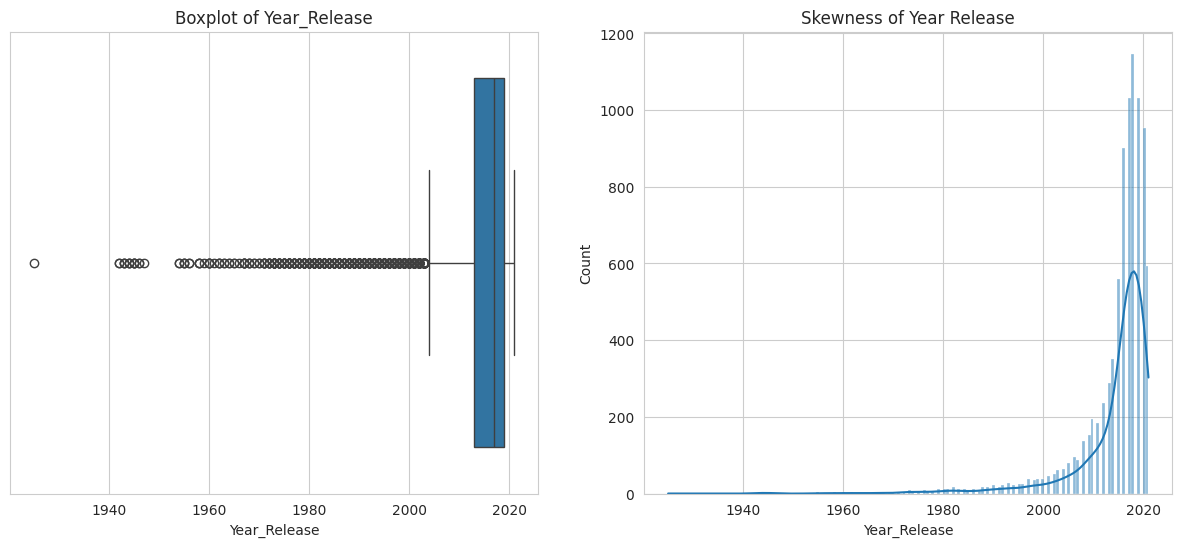

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
ax = sns.boxplot(data=df_pd, x='Year_Release')
ax.set_title('Boxplot of Year_Release')
# ax.set_ylabel()

plt.subplot(1,2,2)
ax = sns.histplot(df_pd['Year_Release'], kde=True)
ax.set_title('Skewness of Year Release')

plt.show()

In [ ]:
year_release = df['Year_Release']

mean = year_release.mean()
std = year_release.std()

skewness = ((year_release - mean) ** 3).mean() / (std ** 3)
print(f"Skewness: {skewness}")

Skewness: -3.4453910977366617


skewness is given by:
$$
\frac{E[(X - \mu)^3]}{\sigma^3}
$$

In [ ]:
# Calculate Q1 and Q3 quantiles
Q1 = df.select(pl.col("Year_Release").quantile(0.25)).item()
Q3 = df.select(pl.col("Year_Release").quantile(0.75)).item()
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df.filter(
    (pl.col("Year_Release") < lower_bound) | (pl.col("Year_Release") > upper_bound)
)

num_outliers = outliers.height
total_data_points = df.height
percent_outliers = (num_outliers / total_data_points) * 100

print(f'Percentage of outliers in Year_Release: {percent_outliers:.2f}%')

Percentage of outliers in Year_Release: 8.16%


In [ ]:
min_year = outliers.select(pl.col("Year_Release").min()).item()
max_year = outliers.select(pl.col("Year_Release").max()).item()

print(f"Min Year_Release: {min_year}")
print(f"Max Year_Release: {max_year}")

Min Year_Release: 1925
Max Year_Release: 2003


In [ ]:
df_no_outliers = df.filter(
    (pl.col("Year_Release") >= lower_bound) & (pl.col("Year_Release") <= upper_bound)
)

year_release_no_outliers = df_no_outliers["Year_Release"]
mean = year_release_no_outliers.mean()
std = year_release_no_outliers.std()
skewness = ((year_release_no_outliers - mean) ** 3).mean() / (std ** 3)

print(f"Skewness of Year Release after handling outliers is {skewness}")

Skewness of Year Release after handling outliers is -1.1933659911245522


In [ ]:
min_year = df_no_outliers.select(pl.col("Year_Release").min()).item()
max_year = df_no_outliers.select(pl.col("Year_Release").max()).item()

print(f"Min Year_Release: {min_year}")
print(f"Max Year_Release: {max_year}")

Min Year_Release: 2004
Max Year_Release: 2021


In [ ]:
df = df_no_outliers

In [ ]:
df = df.with_columns(
    pl.col("Date_Added").str.strptime(pl.Date, format="%B %d, %Y", strict=False).alias("Date_Added")
)

In [ ]:
for col in df.columns:
    unique_count = df.select(pl.col(col).n_unique()).item()
    print(f'{col}: {unique_count}')

Show_ID: 8088
Video_Type: 2
Title: 8088
Director: 4200
Cast: 7012
Country: 705
Date_Added: 1705
Year_Release: 18
Rating: 14
Duration: 201
Genres: 464
Description: 8060


In [ ]:
df.schema

Schema([('Show_ID', String),
        ('Video_Type', String),
        ('Title', String),
        ('Director', String),
        ('Cast', String),
        ('Country', String),
        ('Date_Added', Date),
        ('Year_Release', Int64),
        ('Rating', String),
        ('Duration', String),
        ('Genres', String),
        ('Description', String)])

# **Exploratory Data Analysis**

In [ ]:
movie_df = df.filter(pl.col("Video_Type") == "Movie")
tv_show_df = df.filter(pl.col("Video_Type") == "TV Show")

Due to the inherent differences between movie and tv shows, we'll carry out a significant portion of the EDA with the dataframe split between movies and tv shows

## **What is the Distribution of Video Type in Netflix?**

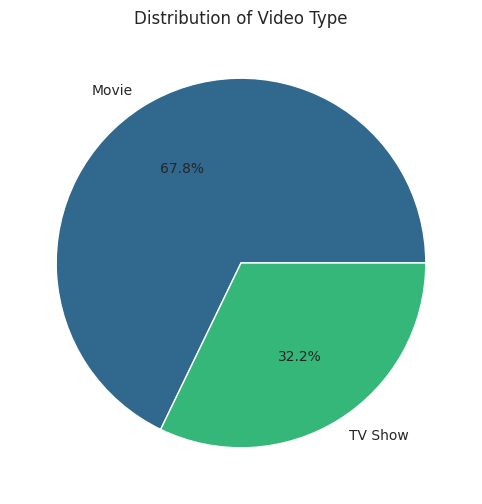

In [ ]:
video_type_counts = df.group_by("Video_Type").len()

labels = video_type_counts['Video_Type'].to_list()
sizes = video_type_counts['len'].to_list()

plt.figure(figsize=(10, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=sns.color_palette('viridis', len(labels))
)
plt.title('Distribution of Video Type')
plt.show()

1.   **Chart Description**

*   **Movies**: Represent 67.9% of the total content.
*   **TV Shows**: Represent 32.1% of the total content.

2.   **Interpretation**

*   **Majority Content**: The majority of the content available on Netflix is Movies, which make up approximately two-thirds of the entire catalog.
*  **Significant Portion**: TV Shows also constitute a significant portion, making up about one-third of the content.

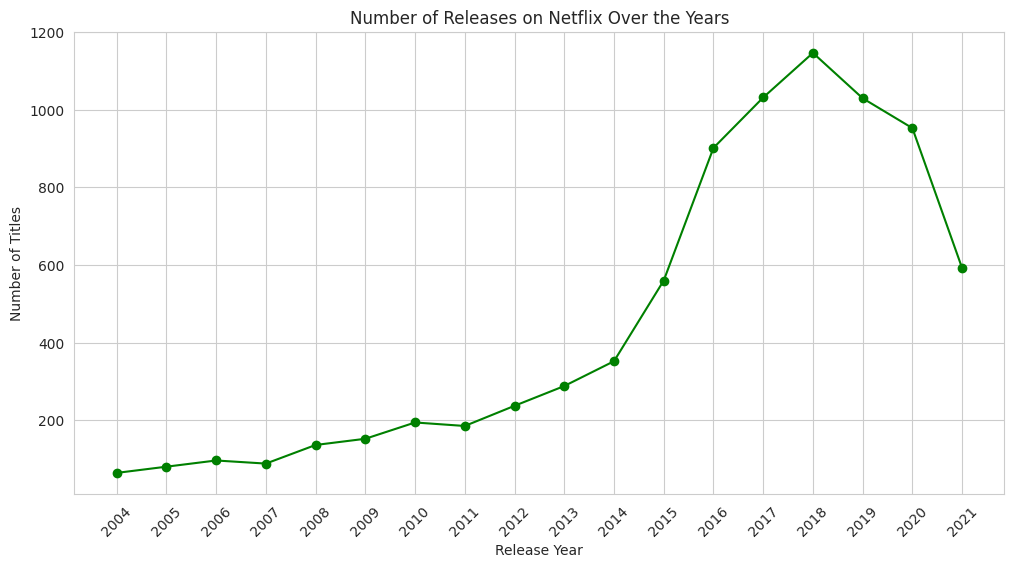

In [ ]:
release_counts = df.group_by("Year_Release").len().sort("Year_Release")

years = release_counts['Year_Release'].to_list()
counts = release_counts['len'].to_list()

plt.figure(figsize=(12, 6))
plt.plot(years, counts, marker='o', color='green')
plt.title('Number of Releases on Netflix Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(ticks=years, labels=years, rotation=45)
plt.grid(True)
plt.show()

In [ ]:
pl.col("Date_Added").dt.year()

<Expr ['col("Date_Added").dt.year()'] at 0x76C2B042DE70>

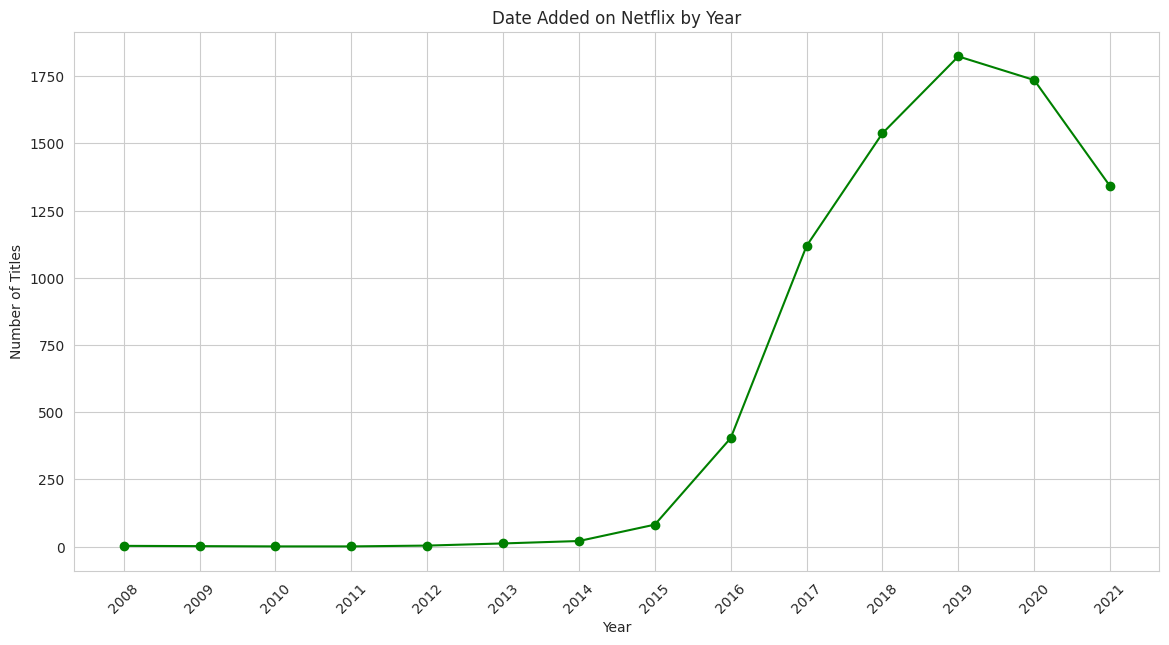

In [ ]:
release_counts = (
    df.select(
        pl.col("Date_Added").dt.year().alias("Year_Added")
    )
    .group_by("Year_Added")
    .len()
    .sort("Year_Added")
)

years = release_counts["Year_Added"].to_list()
counts = release_counts["len"].to_list()

plt.figure(figsize=(14, 7))
plt.plot(years, counts, marker='o', color='green')
plt.title('Date Added on Netflix by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')

plt.xticks(ticks=years, labels=years, rotation=45)
plt.grid(True)
plt.show()

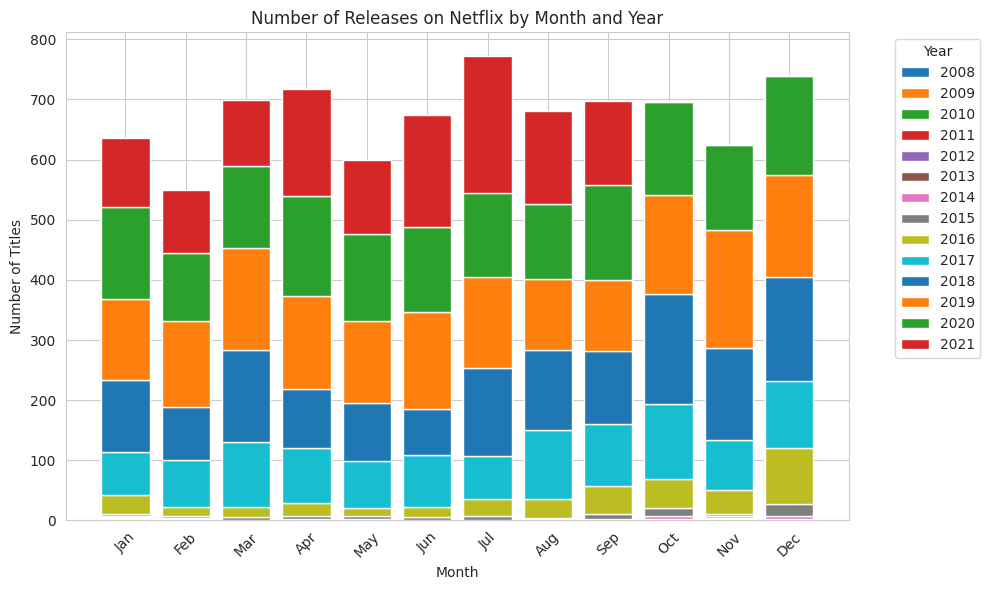

In [ ]:
df_tmp = df.select([
    pl.col("Date_Added").dt.year().alias("Year_Added"),
    pl.col("Date_Added").dt.month().alias("Month_Added")
])

# Group by Month and Year, count titles
grouped = (
    df_tmp.group_by(["Month_Added", "Year_Added"])
    .len()
    .rename({"len": "num_titles"})
)

# Pivot the data: rows=Month_Added, columns=Year_Added, values=num_titles
pivot = grouped.pivot(
    values="num_titles",
    index="Month_Added",
    on="Year_Added",
    aggregate_function="first"
).fill_null(0).sort("Month_Added")

month_names = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]

# Extract the matrix data and column (year) labels
months = pivot["Month_Added"].to_list()
year_cols = [col for col in pivot.columns if col != "Month_Added"]
years_sorted = sorted(year_cols, key=int)
years = [str(y) for y in years_sorted]
data = pivot.select(years).to_numpy()

plt.figure(figsize=(10, 6))

bottom = [0] * len(months)
for i, year in enumerate(years):
    plt.bar(months, data[:, i], bottom=bottom, label=year)
    bottom = [bottom[j] + data[j, i] for j in range(len(months))]

plt.title('Number of Releases on Netflix by Month and Year')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(ticks=months, labels=month_names, rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## **How is the distribution of videos categorized by country?**

In [ ]:
tv_country_counts = tv_show_df['Country'].value_counts().sort(by="count", descending=True)
with pl.Config(set_tbl_formatting="UTF8_FULL_CONDENSED"):
  print(tv_country_counts)

shape: (191, 2)
┌─────────────────────────────────┬───────┐
│ Country                         ┆ count │
│ ---                             ┆ ---   │
│ str                             ┆ u32   │
╞═════════════════════════════════╪═══════╡
│ United States                   ┆ 731   │
│ Unknown                         ┆ 385   │
│ United Kingdom                  ┆ 208   │
│ Japan                           ┆ 159   │
│ South Korea                     ┆ 158   │
│ …                               ┆ …     │
│ Spain, Italy                    ┆ 1     │
│ Australia, Canada               ┆ 1     │
│ Finland                         ┆ 1     │
│ India, United States            ┆ 1     │
│ Denmark, Singapore, Canada, Un… ┆ 1     │
└─────────────────────────────────┴───────┘


In [ ]:
movie_country_counts = movie_df['Country'].value_counts().sort(by="count", descending=True)
with pl.Config(set_tbl_formatting="UTF8_FULL_CONDENSED"):
  print(movie_country_counts)

shape: (610, 2)
┌─────────────────────────────────┬───────┐
│ Country                         ┆ count │
│ ---                             ┆ ---   │
│ str                             ┆ u32   │
╞═════════════════════════════════╪═══════╡
│ United States                   ┆ 1763  │
│ India                           ┆ 776   │
│ Unknown                         ┆ 418   │
│ United Kingdom                  ┆ 189   │
│ Canada                          ┆ 121   │
│ …                               ┆ …     │
│ Israel, Germany, France         ┆ 1     │
│ United States, Hungary          ┆ 1     │
│ United States, Canada, Germany  ┆ 1     │
│ China, India, Nepal             ┆ 1     │
│ United Kingdom, Hungary, Austr… ┆ 1     │
└─────────────────────────────────┴───────┘


First we check how the data in the Country column looks like. We can observe that there are more than one country in some rows, which need to be splitted up.

In [ ]:
# For TV Shows
tv_country_split = tv_show_df.with_columns(
    pl.col("Country").str.split(", ")
).explode("Country")

# For Movies
movie_country_split = movie_df.with_columns(
    pl.col("Country").str.split(", ")
).explode("Country")

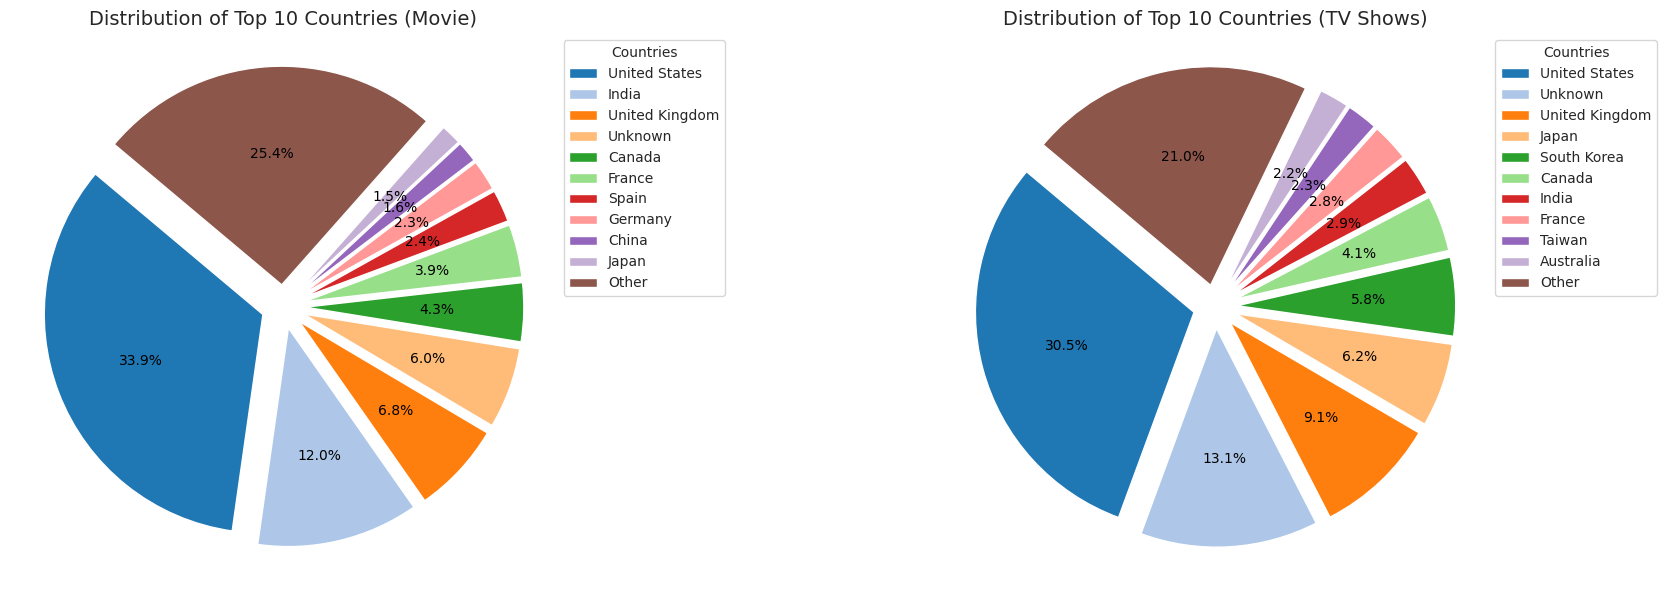

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

for i, (dfs, title) in enumerate(zip([movie_country_split, tv_country_split], ['Movie', 'TV Shows'])):
    country_counts = dfs['Country'].value_counts().sort("count", descending=True)

    top_10 = country_counts[:10]
    other_count = country_counts[10:]["count"].sum()

    labels = top_10["Country"].to_list() + ["Other"]
    sizes = top_10["count"].to_list() + [other_count]

    wedges, texts, autotexts = axs[i].pie(
        sizes,
        labels=None,  # We show labels in the legend
        autopct='%1.1f%%',
        colors=plt.get_cmap('tab20').colors[:len(sizes)],
        textprops={'fontsize': 10, 'color': 'black'},
        startangle=140,
        explode=[0.1] * len(sizes)
    )

    axs[i].legend(wedges, labels, title="Countries", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
    axs[i].set_title(f'Distribution of Top 10 Countries ({title})', fontsize=14)

plt.tight_layout()
plt.show()

## **What is the distribution of video genres on Netflix, and which genre(s) is the most popular?**


In [ ]:
movie_df.select("Genres").unique()["Genres"].to_list()

['Dramas, International Movies, LGBTQ Movies',
 'Action & Adventure, Comedies, Sci-Fi & Fantasy',
 'Dramas, LGBTQ Movies',
 'Dramas, International Movies, Romantic Movies',
 'Comedies, Independent Movies, LGBTQ Movies',
 'Children & Family Movies, Dramas, Sports Movies',
 'Comedies, Documentaries, International Movies',
 'Documentaries, Horror Movies',
 'Action & Adventure, Dramas, Romantic Movies',
 'Documentaries, Music & Musicals',
 'Action & Adventure, Comedies, Sports Movies',
 'Anime Features, Children & Family Movies, International Movies',
 'Action & Adventure, Dramas, Faith & Spirituality',
 'Documentaries, International Movies',
 'Children & Family Movies, Comedies, Romantic Movies',
 'Action & Adventure, Children & Family Movies, Independent Movies',
 'Action & Adventure, Comedies',
 'Action & Adventure, Cult Movies, Sci-Fi & Fantasy',
 'Romantic Movies',
 'Action & Adventure, Children & Family Movies',
 'Dramas, International Movies, Sports Movies',
 'Dramas, Horror Movies,

In [ ]:
tv_show_df.select("Genres").unique()["Genres"].to_list()

['International TV Shows, Romantic TV Shows, TV Dramas',
 "International TV Shows, Kids' TV, TV Mysteries",
 'Stand-Up Comedy & Talk Shows',
 'TV Horror, TV Mysteries, TV Thrillers',
 'International TV Shows, TV Dramas, TV Thrillers',
 'Classic & Cult TV, TV Action & Adventure, TV Dramas',
 'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
 'TV Dramas, TV Sci-Fi & Fantasy, TV Thrillers',
 'Crime TV Shows, TV Comedies, Teen TV Shows',
 'Romantic TV Shows, TV Dramas',
 'Classic & Cult TV, TV Action & Adventure, TV Horror',
 'International TV Shows, Romantic TV Shows, Spanish-Language TV Shows',
 'International TV Shows, TV Action & Adventure, TV Comedies',
 'Crime TV Shows, TV Horror, TV Mysteries',
 "Kids' TV, Korean TV Shows, TV Comedies",
 'International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure, TV Sci-Fi & Fantasy',
 'Crime TV Shows, Romantic TV Shows, TV Dramas',
 'British TV Shows, TV Dramas, TV Sci-Fi & F

Same case as Country, we need to split the genres that are separated by commas

In [ ]:
tv_show_df_split = tv_show_df.with_columns(
    pl.col("Genres").str.split(", ")
).explode("Genres")

movie_df_split = movie_df.with_columns(
    pl.col("Genres").str.split(", ")
).explode("Genres")

with pl.Config(set_tbl_formatting="UTF8_FULL_CONDENSED", set_tbl_width_chars=-1, set_tbl_rows=10):
  print(tv_show_df_split)
  print(movie_df_split)

shape: (5_997, 12)
┌─────────┬────────────┬────────────────────┬─────────────────┬───┬────────┬───────────┬────────────────────────┬─────────────────────────────────┐
│ Show_ID ┆ Video_Type ┆ Title              ┆ Director        ┆ … ┆ Rating ┆ Duration  ┆ Genres                 ┆ Description                     │
│ ---     ┆ ---        ┆ ---                ┆ ---             ┆   ┆ ---    ┆ ---       ┆ ---                    ┆ ---                             │
│ str     ┆ str        ┆ str                ┆ str             ┆   ┆ str    ┆ str       ┆ str                    ┆ str                             │
╞═════════╪════════════╪════════════════════╪═════════════════╪═══╪════════╪═══════════╪════════════════════════╪═════════════════════════════════╡
│ s2      ┆ TV Show    ┆ Blood & Water      ┆ Unknown         ┆ … ┆ TV-MA  ┆ 2 Seasons ┆ International TV Shows ┆ After crossing paths at a part… │
│ s2      ┆ TV Show    ┆ Blood & Water      ┆ Unknown         ┆ … ┆ TV-MA  ┆ 2 Seasons ┆ TV D

In [ ]:
genre_counts_tv = tv_show_df_split['Genres'].value_counts().sort(by="count", descending=True)
genre_counts_movie = movie_df_split['Genres'].value_counts().sort(by="count", descending=True)

with pl.Config(set_tbl_formatting="UTF8_FULL_CONDENSED", set_tbl_width_chars=-1, set_tbl_rows=-1):
  print("Genre Counts for TV Show")
  print(genre_counts_tv)
  print("\n")
  print("Genre Counts for Movie")
  print(genre_counts_movie)

Genre Counts for TV Show
shape: (22, 2)
┌──────────────────────────────┬───────┐
│ Genres                       ┆ count │
│ ---                          ┆ ---   │
│ str                          ┆ u32   │
╞══════════════════════════════╪═══════╡
│ International TV Shows       ┆ 1334  │
│ TV Dramas                    ┆ 754   │
│ TV Comedies                  ┆ 562   │
│ Crime TV Shows               ┆ 468   │
│ Kids' TV                     ┆ 428   │
│ Docuseries                   ┆ 389   │
│ Romantic TV Shows            ┆ 364   │
│ Reality TV                   ┆ 252   │
│ British TV Shows             ┆ 247   │
│ Spanish-Language TV Shows    ┆ 171   │
│ Anime Series                 ┆ 165   │
│ TV Action & Adventure        ┆ 163   │
│ Korean TV Shows              ┆ 151   │
│ TV Mysteries                 ┆ 97    │
│ Science & Nature TV          ┆ 92    │
│ TV Sci-Fi & Fantasy          ┆ 79    │
│ TV Horror                    ┆ 75    │
│ Teen TV Shows                ┆ 65    │
│ Stand-Up Comedy

In [ ]:
# Custom colour map based on Netflix palette
cmap = mcolors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])

def genre_heatmap(df1, title):
    import polars as pl

    df1 = df1.with_columns(
        pl.col('Genres')
        .str.replace_all(' ,', ',')
        .str.replace_all(', ', ',')
        .str.split(',')
        .alias('genre')
    )

    # Get all unique genres by exploding the lists
    Types = set(df1.select(pl.col('genre').list.explode())['genre'].unique().to_list())
    print("There are {} types in the Netflix {} Dataset".format(len(Types), title))

    # Get genre lists for MultiLabelBinarizer
    genre_lists = []
    for g in df1['genre'].to_list():
        if g is not None:
            genre_lists.append(g)
        else:
            genre_lists.append([])

    # Create one-hot encoding using MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    res_array = mlb.fit_transform(genre_lists)

    # Create polars DataFrame from the result
    res = pl.DataFrame(res_array, schema=mlb.classes_.tolist())

    # Calculate correlation matrix
    # Convert to numpy for correlation calculation
    corr_matrix = np.corrcoef(res_array.T)

    # Create mask for upper triangle
    mask = np.zeros_like(corr_matrix, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54, .88, 'Genre correlation', fontfamily='serif', fontweight='bold', fontsize=15)

    if title == 'Movie':
      fig.text(.75, .665,
              '''
              Independent Movies
              tend to be Dramas.

              International Movies are rarely
              in the Children's genre.
              ''', fontfamily='serif', fontsize=12, ha='right')

    if title == 'TV Show':
      fig.text(.75, .665,
              '''
              Science TV Shows are
              often Documentaries.

              Kids' TV Shows are
              rarely TV Dramas.
              ''', fontfamily='serif', fontsize=12, ha='right')

    # Plot heatmap using the numpy correlation matrix
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, vmin=-.3,
                center=0, square=True, linewidths=2.5,
                xticklabels=mlb.classes_, yticklabels=mlb.classes_)

    plt.show()

There are 20 types in the Netflix Movie Dataset


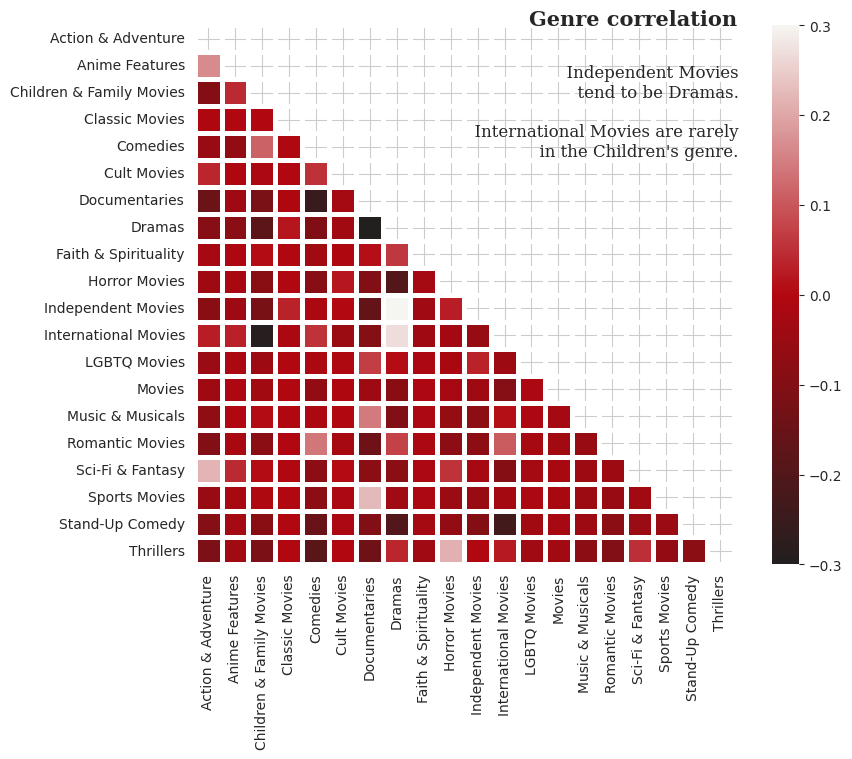

In [ ]:
genre_heatmap(movie_df, 'Movie')

There are 22 types in the Netflix TV Show Dataset


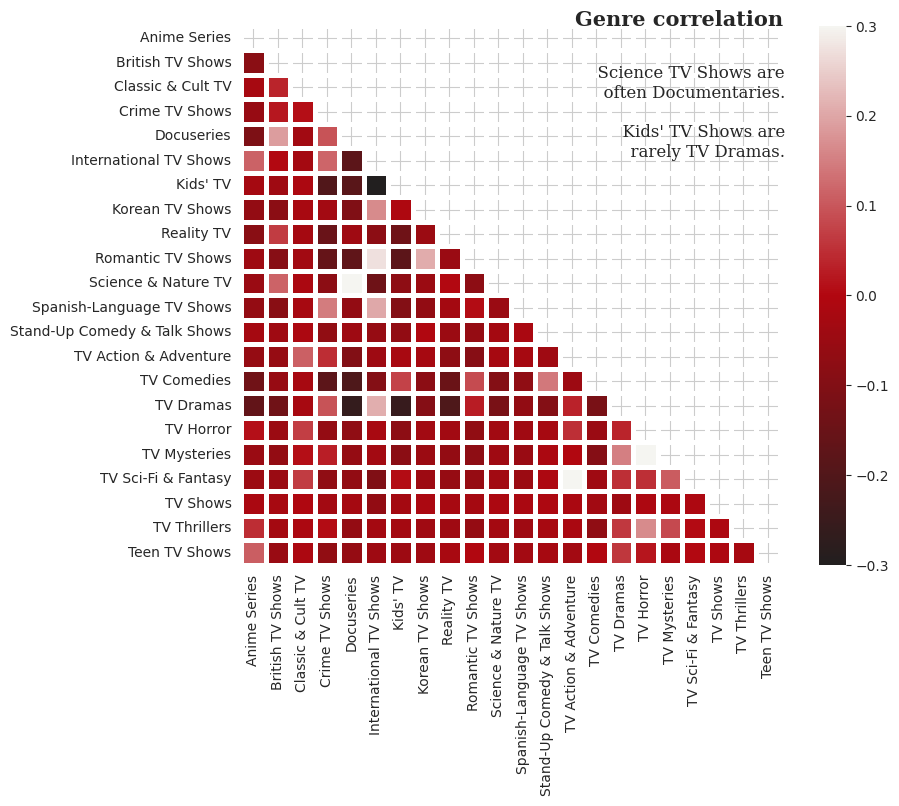

In [ ]:
genre_heatmap(tv_show_df, 'TV Show')

In [ ]:
genre_counts_tv = tv_show_df_split["Genres"].value_counts().with_columns(
    pl.col("count").cast(pl.Int64)
)

genre_counts_movie = movie_df_split["Genres"].value_counts().with_columns(
    pl.col("count").cast(pl.Int64)
)

In [ ]:
genre_counts_list = [genre_counts_tv, genre_counts_movie]

for i, genre_df in enumerate(genre_counts_list):
    top_10 = genre_df.sort("count", descending=True)[:10]

    other = genre_df.sort("count", descending=True)[10:]
    other_count = other["count"].sum()

    top_10 = top_10.vstack(pl.DataFrame({
        "Genres": ["Other"],
        "count": [other_count]
    }))

    # Convert to pandas for Plotly (Plotly requires pandas or dict-like input)
    df_genre = top_10.rename({"Genres": "Genre", "count": "Count"}).to_pandas()

    fig = px.pie(
        df_genre,
        values='Count',
        names='Genre',
        title='Distribution of TV Show Genres' if i == 0 else 'Distribution of Movie Genres',
        hover_data=['Count'],
        labels={'Count': 'Count'}
    )

    fig.update_layout(
        width=800,
        height=800,
        legend_title="Genres"
    )
    fig.update_traces(
        textinfo='percent',
        texttemplate='<b>%{percent}</b>',
        textfont=dict(size=16, color='black', family='Arial')
    )

    fig.show()


1.   **Chart Description**

> *  **Genre**: Represents different genres available in the Netflix dataset.
> *   **Count**: Represents the number of titles available for each genre.

2.   **Interpretation**

> *   **Most Common Genres**: The pie chart allows us to quickly identify which genres are most prevalent in the Netflix catalog. The largest slices represent the genres with the highest number of titles.
> *   **Diversity of Genres**: It shows the variety and distribution of genres, indicating how Netflix diversifies its content offerings.

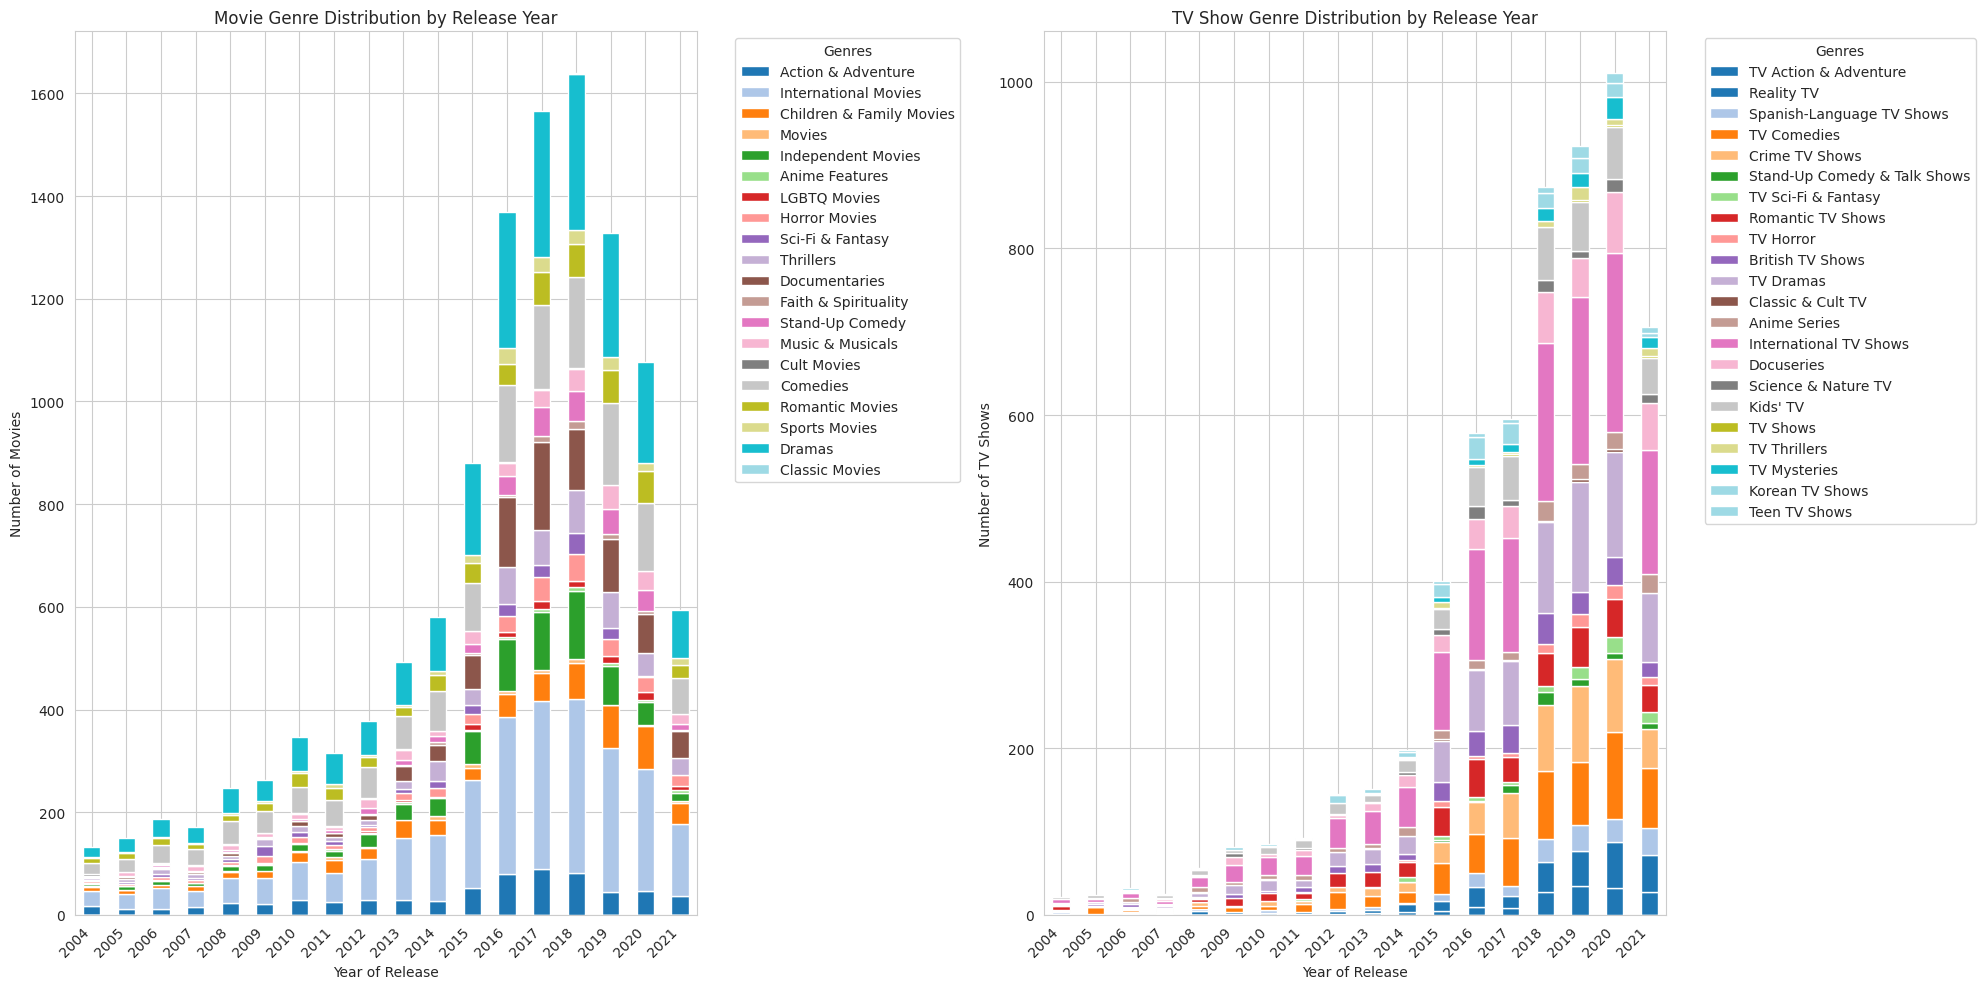

In [ ]:
movie_genre_year_count = (
    movie_df_split
    .group_by(["Year_Release", "Genres"])
    .agg(pl.len())
    .pivot(
        index="Year_Release",
        on="Genres",
        values="len",
        aggregate_function="first"
    )
    .fill_null(0)
    .sort("Year_Release")
)

tv_show_genre_year_count = (
    tv_show_df_split
    .group_by(["Year_Release", "Genres"])
    .agg(pl.len())
    .pivot(
        index="Year_Release",
        on="Genres",
        values="len",
        aggregate_function="first"
    )
    .fill_null(0)
    .sort("Year_Release")
)

movie_pd = movie_genre_year_count.to_pandas().set_index("Year_Release")
tv_pd = tv_show_genre_year_count.to_pandas().set_index("Year_Release")

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

movie_pd.plot(kind='bar', stacked=True, ax=axes[0], colormap='tab20')
axes[0].set_title('Movie Genre Distribution by Release Year')
axes[0].set_xlabel('Year of Release')
axes[0].set_ylabel('Number of Movies')
axes[0].legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

tv_pd.plot(kind='bar', stacked=True, ax=axes[1], colormap='tab20')
axes[1].set_title('TV Show Genre Distribution by Release Year')
axes[1].set_xlabel('Year of Release')
axes[1].set_ylabel('Number of TV Shows')
axes[1].legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
# def plot_genre_year(df, ax, title):
#     years = df['Year_Release'].to_list()
#     genres = [col for col in df.columns if col != 'Year_Release']

#     counts_per_genre = [df[col].to_list() for col in genres]

#     bottom = np.zeros(len(years))
#     for genre, counts in zip(genres, counts_per_genre):
#         ax.bar(years, counts, bottom=bottom, label=genre)
#         bottom += counts

#     ax.set_title(title)
#     ax.set_xlabel('Year of Release')
#     ax.set_ylabel('Count')
#     ax.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
#     ax.set_xticks(years)
#     ax.set_xticklabels(years, rotation=45, ha='right')

# fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# plot_genre_year(movie_genre_year_count, axes[0], 'Movie Genre Distribution by Release Year')
# plot_genre_year(tv_show_genre_year_count, axes[1], 'TV Show Genre Distribution by Release Year')

# plt.tight_layout()
# plt.show()

1. **Chart Descriptions**

* **X-axis**: Year of Release (from 2004 to 2021)
* **Y-axis**: Number of Movies
* **Bars**: Each bar represents the total number of movies released in a given year, segmented by genre. Different colors represent different genres.
* **Legend**: Lists the movie genres, each with a corresponding color in the chart.

2. **Interpretations**
* Both movies and TV shows exhibit a general increase in the number of releases over the years from 2004 to around 2019. There’s a noticeable peak in the late 2010s, followed by a **slight decline**.

## **How is the distribution of content ratings for videos on Netflix, and how has it changed over the years?**

In [ ]:
df.select("Rating").unique()["Rating"].to_list()

['TV-Y7',
 'TV-MA',
 'PG',
 'G',
 'NC-17',
 'PG-13',
 'TV-PG',
 'TV-G',
 'NR',
 'TV-Y',
 'TV-14',
 'TV-Y7-FV',
 'UR',
 'R']

In [ ]:
df.select(pl.col("Rating").value_counts())

shape: (14, 1)
┌────────────────┐
│ Rating         │
│ ---            │
│ struct[2]      │
╞════════════════╡
│ {"TV-Y7",318}  │
│ {"G",21}       │
│ {"TV-MA",3128} │
│ {"PG-13",380}  │
│ {"NC-17",3}    │
│ …              │
│ {"TV-Y",304}   │
│ {"TV-G",208}   │
│ {"R",638}      │
│ {"TV-PG",798}  │
│ {"PG",222}     │
└────────────────┘

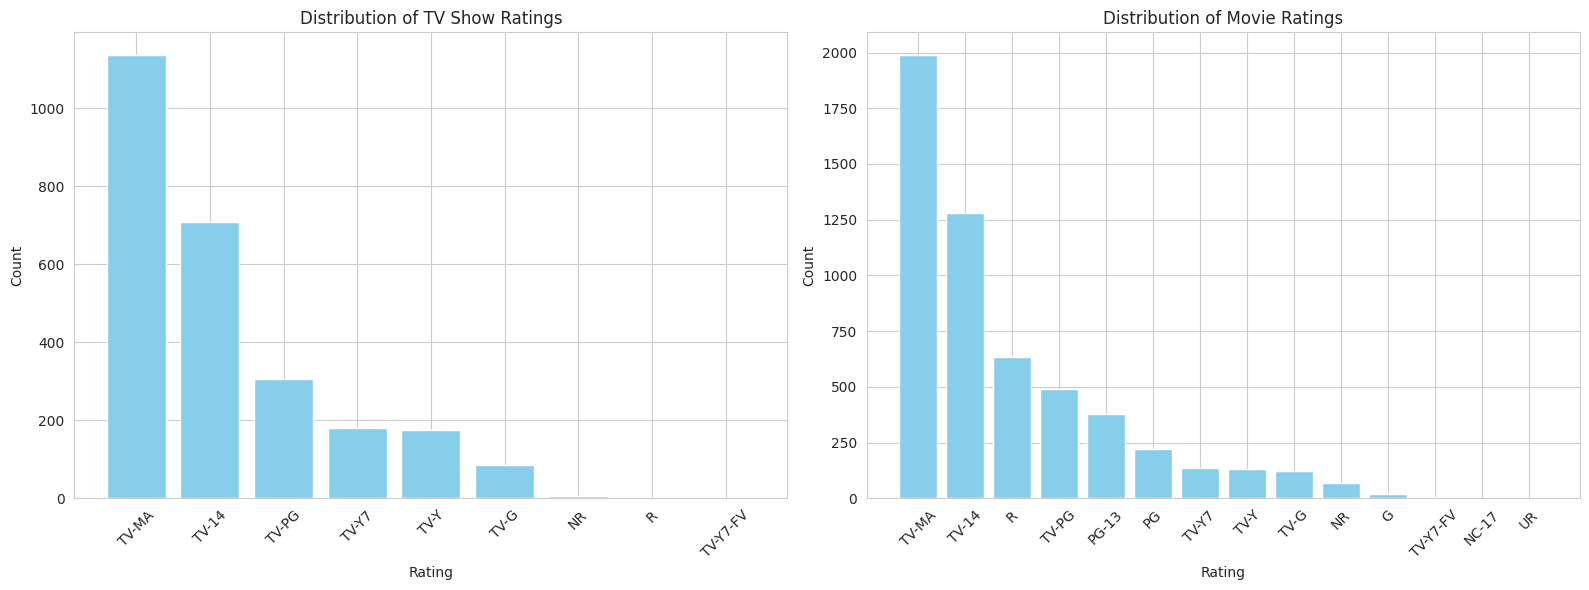

In [ ]:
dfs = [tv_show_df, movie_df]
titles = ['Distribution of TV Show Ratings', 'Distribution of Movie Ratings']

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

for i, df1 in enumerate(dfs):
    rating_counts_df = (
        df1.select(pl.col("Rating").value_counts())
          .unnest("Rating")
          .sort("count", descending=True)
    )

    ratings = rating_counts_df["Rating"].to_list()
    counts = rating_counts_df["count"].to_list()

    axs[i].bar(ratings, counts, color='skyblue')
    axs[i].set_title(titles[i])
    axs[i].set_xlabel("Rating")
    axs[i].set_ylabel("Count")
    axs[i].set_xticks(range(len(ratings)))
    axs[i].set_xticklabels(ratings, rotation=45)

plt.tight_layout()
plt.show()

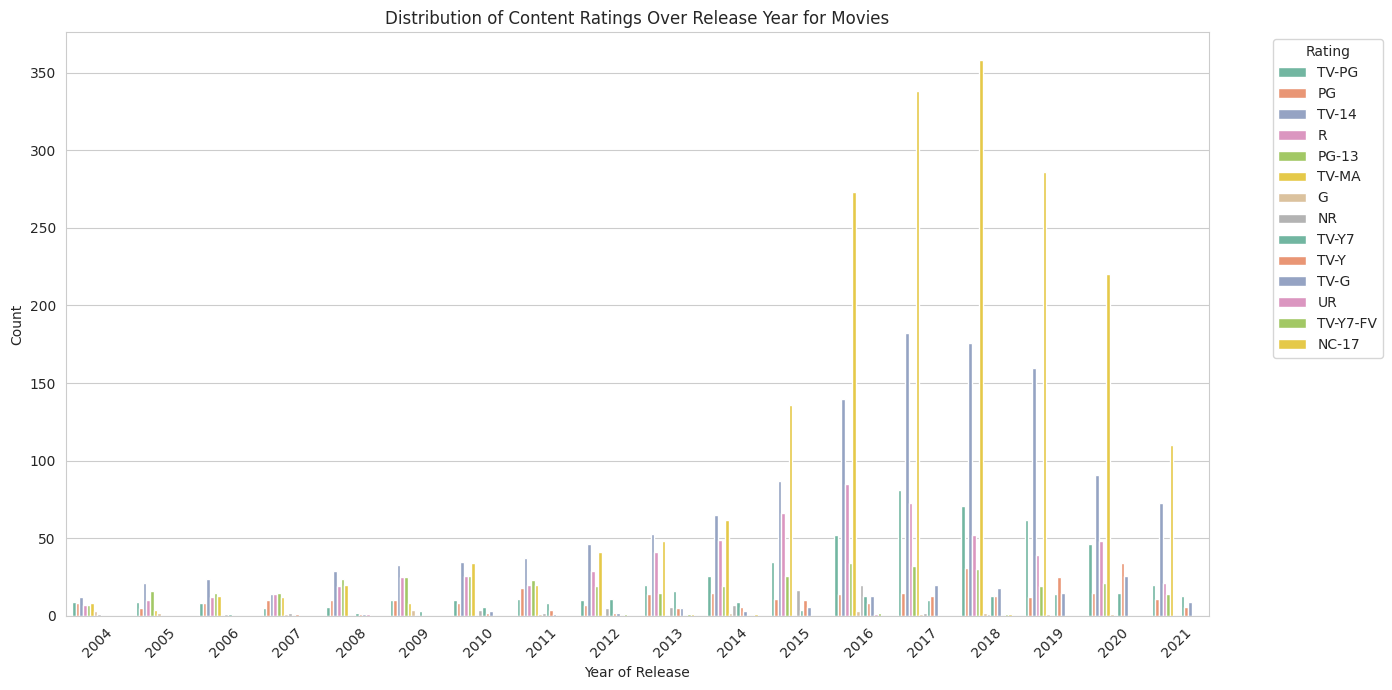

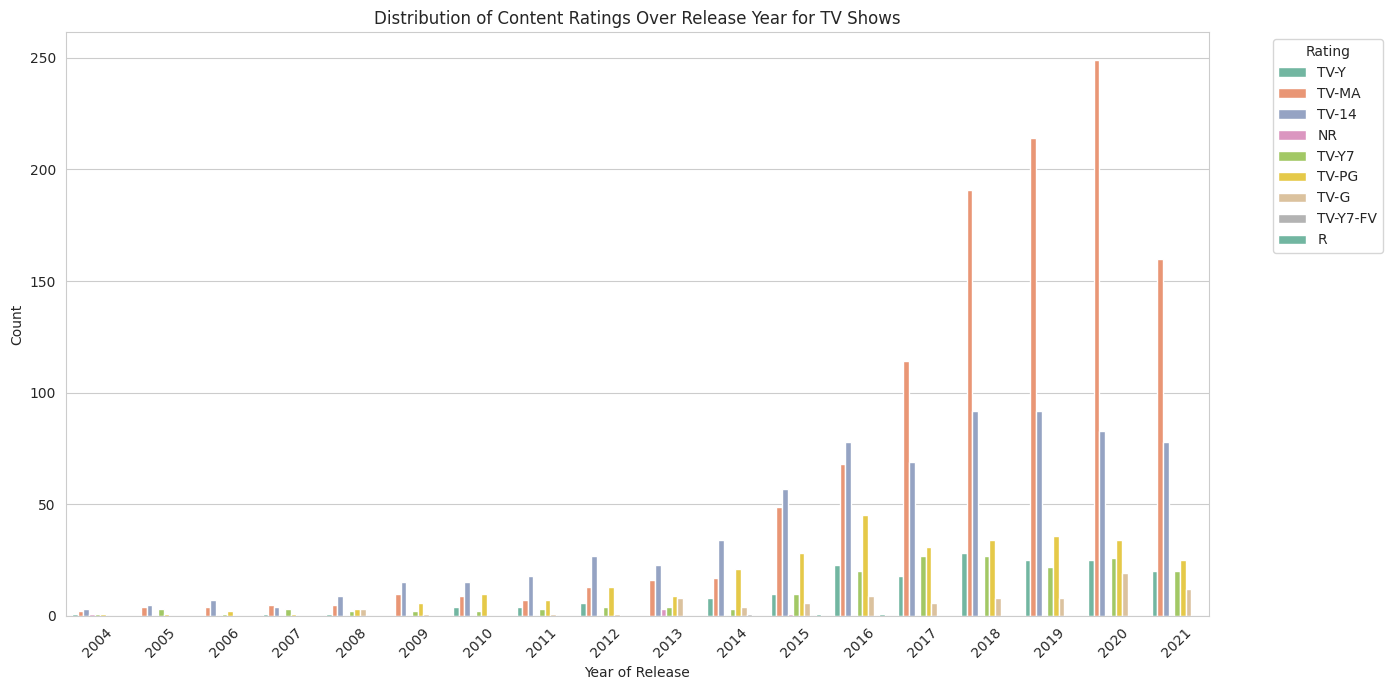

In [ ]:
for df1, title in zip([movie_df, tv_show_df], ['Movies', 'TV Shows']):
    plt.figure(figsize=(14, 7))
    sns.countplot(data=df1, x='Year_Release', hue='Rating', palette='Set2')
    plt.xticks(rotation=45)
    plt.xlabel('Year of Release')
    plt.ylabel('Count')
    plt.title(f'Distribution of Content Ratings Over Release Year for {title}')
    plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

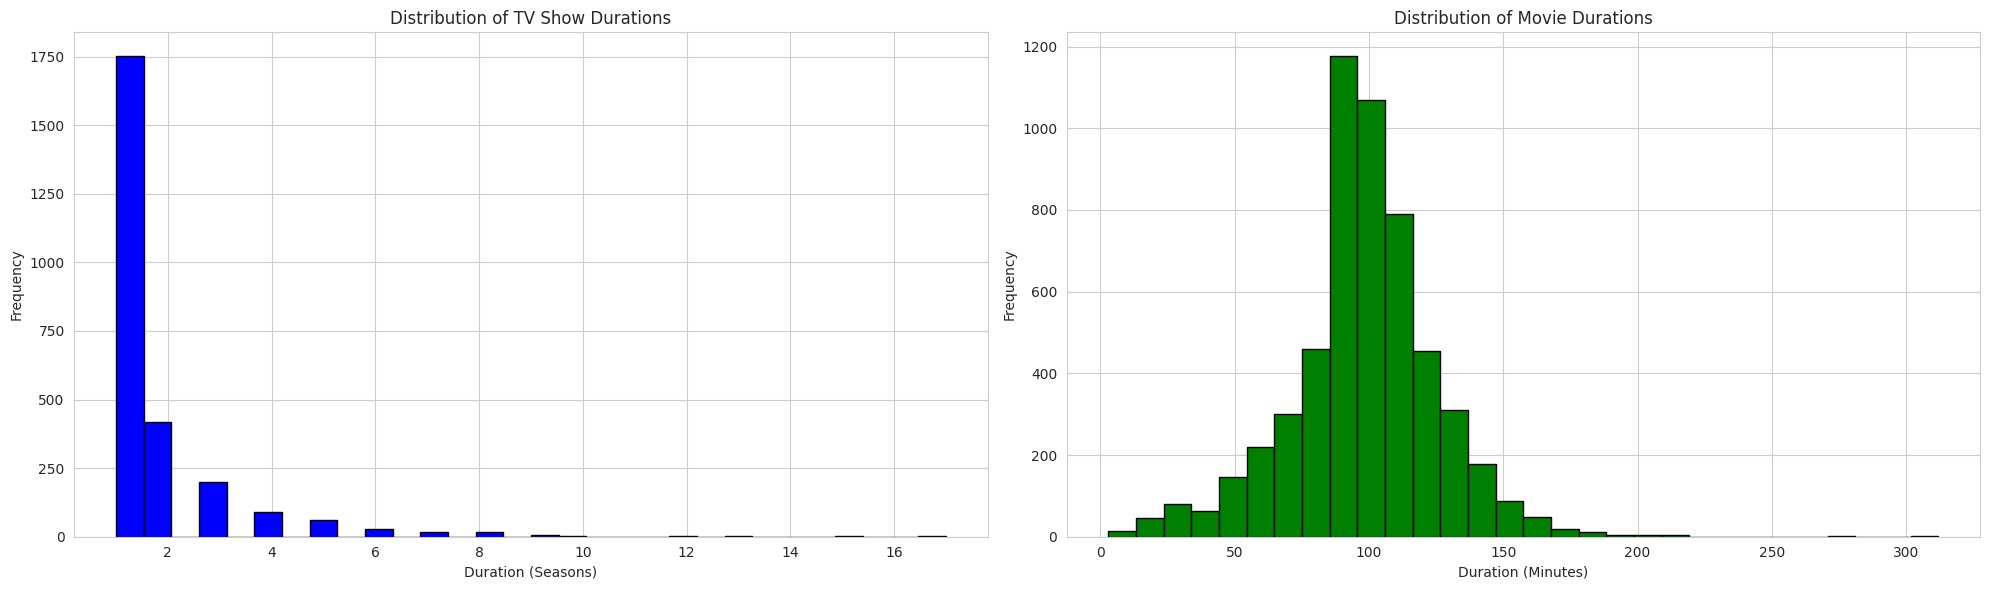

In [ ]:
movie_df = movie_df.with_columns(
    pl.col('Duration')
    .str.extract(r'(\d+)')
    .cast(pl.Float64)
)

tv_show_df = tv_show_df.with_columns(
    pl.col('Duration')
    .str.extract(r'(\d+)')
    .cast(pl.Float64)
)

movie_durations = movie_df['Duration'].drop_nulls().to_list()
tv_durations = tv_show_df['Duration'].drop_nulls().to_list()

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

axs[0].hist(tv_durations, bins=30, color='blue', edgecolor='black')
axs[0].set_title('Distribution of TV Show Durations')
axs[0].set_xlabel('Duration (Seasons)')
axs[0].set_ylabel('Frequency')

axs[1].hist(movie_durations, bins=30, color='green', edgecolor='black')
axs[1].set_title('Distribution of Movie Durations')
axs[1].set_xlabel('Duration (Minutes)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

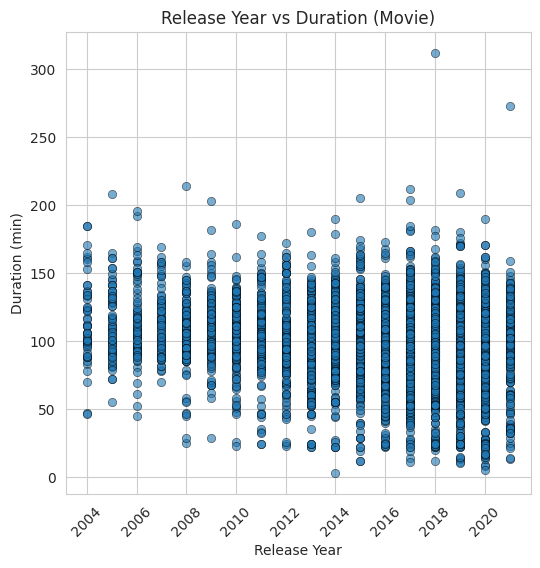

In [ ]:
years = movie_df['Year_Release'].unique().sort().to_list()

plt.figure(figsize=(6, 6))
plt.scatter(
    movie_df['Year_Release'].to_list(),
    movie_df['Duration'].drop_nulls().cast(pl.Int64).to_list(),
    alpha=0.6,
    edgecolor='k',
    linewidth=0.5
)
plt.xlabel('Release Year')
plt.ylabel('Duration (min)')
plt.title('Release Year vs Duration (Movie)')
plt.xticks(years[::2], rotation=45)
plt.show()

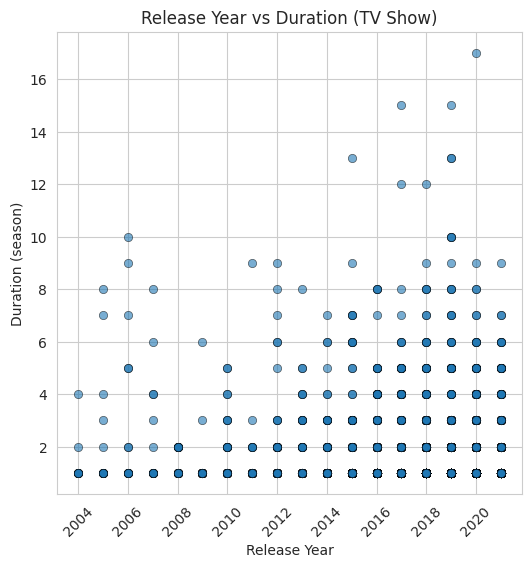

In [ ]:
years = tv_show_df['Year_Release'].unique().sort().to_list()

plt.figure(figsize=(6, 6))
plt.scatter(
    tv_show_df['Year_Release'].to_list(),
    tv_show_df['Duration'].drop_nulls().cast(pl.Int64).to_list(),
    alpha=0.6,
    edgecolor='k',
    linewidth=0.5
)
plt.xlabel('Release Year')
plt.ylabel('Duration (season)')
plt.title('Release Year vs Duration (TV Show)')
plt.xticks(years[::2], rotation=45)
plt.show()

## **What are the most frequent words in the titles of videos on Netflix?**

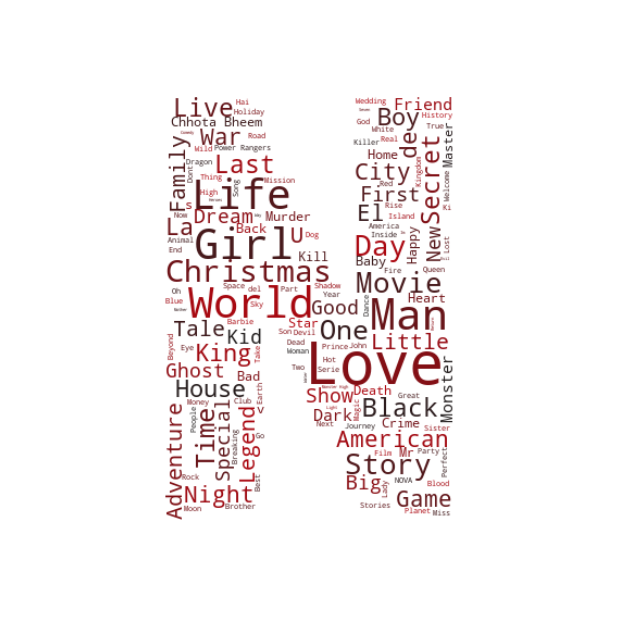

In [ ]:
from wordcloud import WordCloud
from PIL import Image, ImageOps

# Custom colour map based on Netflix palette
cmap = mcolors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

text = str(list(df['Title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

image = Image.open('./Netflix_logo_mask.jpg')

width, height = image.size
left = width // 8
top = height // 8
right = 7 * width // 8
bottom = 7 * height // 8

cropped_image = image.crop((left, top, right, bottom))

gray_image = ImageOps.grayscale(cropped_image)

# Invert the grayscale image to create a binary mask
mask = np.array(gray_image)
mask = np.where(mask > 128, 0, 255)

wordcloud = WordCloud(background_color='white', width=500, height=200, colormap=cmap, max_words=150, mask=mask).generate(text)

plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

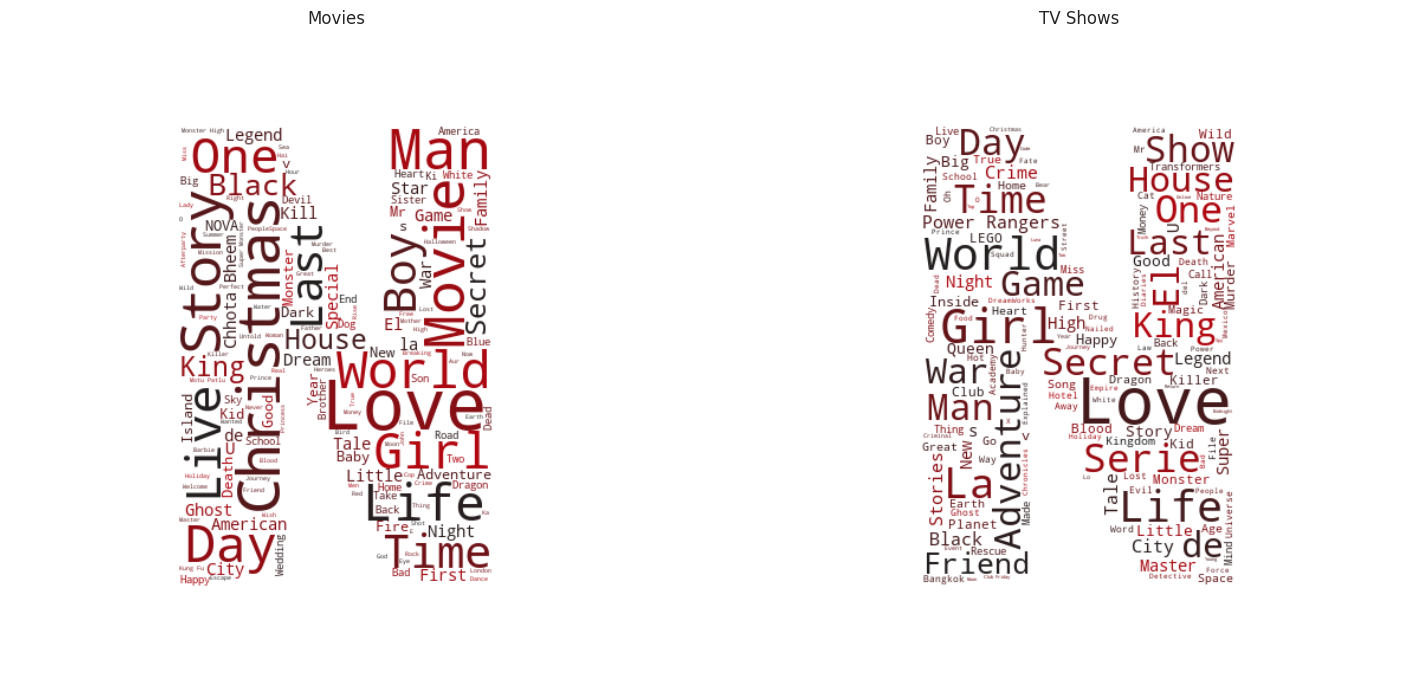

In [ ]:
def generate_wordcloud(text, ax, title):
    wordcloud = WordCloud(background_color='white', width=500, height=200, colormap=cmap, max_words=150, mask=mask).generate(text)

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title)

movie_text = " ".join(title for title in movie_df['Title'] if isinstance(title, str))
tv_show_text = " ".join(title for title in tv_show_df['Title'] if isinstance(title, str))

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

generate_wordcloud(movie_text, axes[0], 'Movies')
generate_wordcloud(tv_show_text, axes[1], 'TV Shows')

plt.tight_layout()
plt.show()

## **What are the frequent words in description?**

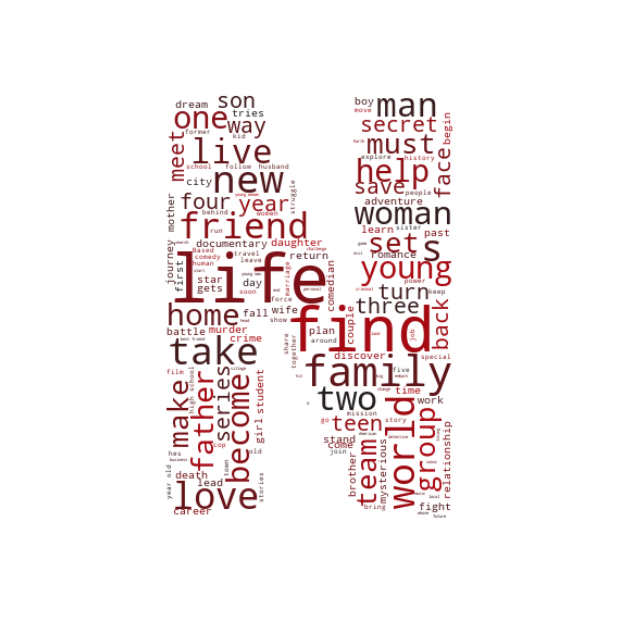

In [ ]:
text = str(list(df['Description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

image = Image.open('./Netflix_logo_mask.jpg')

width, height = image.size
left = width // 8
top = height // 8
right = 7 * width // 8
bottom = 7 * height // 8

cropped_image = image.crop((left, top, right, bottom))

gray_image = ImageOps.grayscale(cropped_image)

# Invert the grayscale image to create a binary mask
mask = np.array(gray_image)
mask = np.where(mask > 128, 0, 255)

wordcloud = WordCloud(background_color='white', width=500, height=200, colormap=cmap, max_words=150, mask=mask).generate(text)

plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

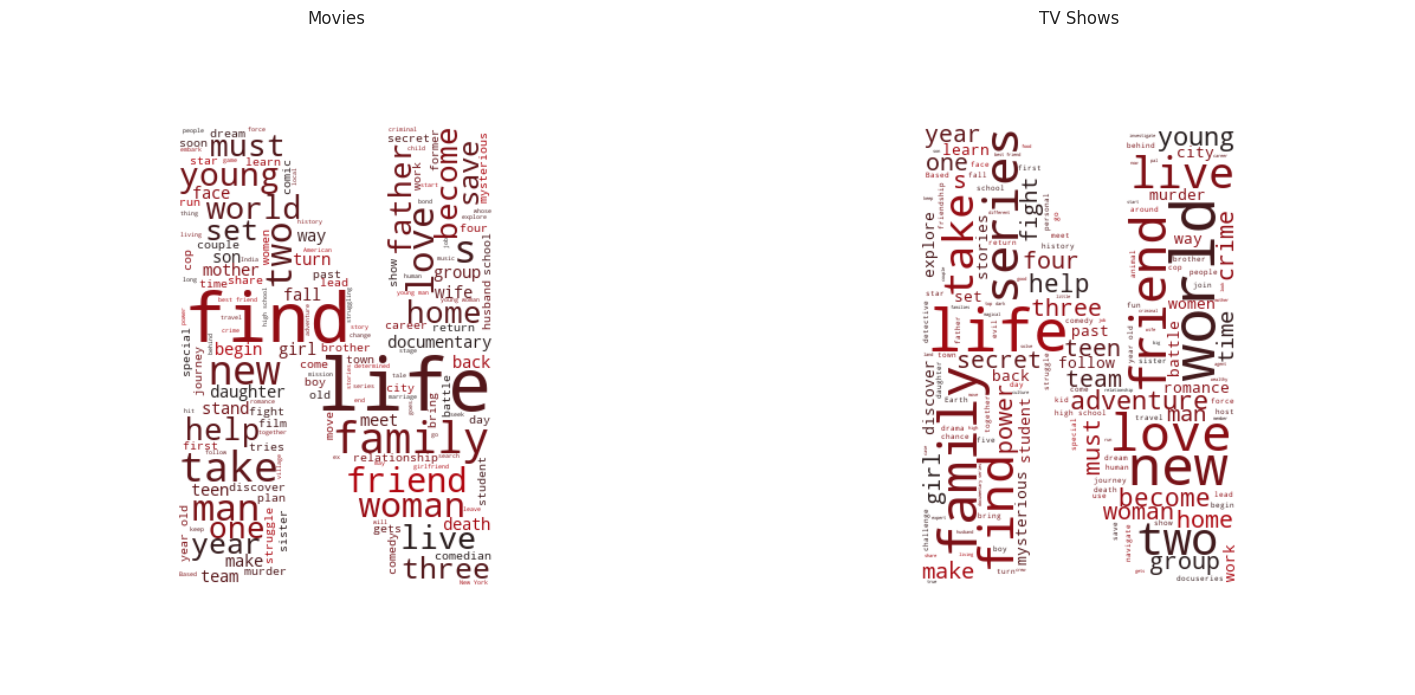

In [ ]:
def generate_wordcloud(text, ax, title):
    wordcloud = WordCloud(background_color='white', width=500, height=200, colormap=cmap, max_words=150, mask=mask).generate(text)

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title)

movie_text = " ".join(description for description in movie_df['Description'] if isinstance(description, str))
tv_show_text = " ".join(description for description in tv_show_df['Description'] if isinstance(description, str))

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

generate_wordcloud(movie_text, axes[0], 'Movies')
generate_wordcloud(tv_show_text, axes[1], 'TV Shows')

plt.tight_layout()
plt.show()

**Movies**

*   Dominant words include "**life**", "**young**", "**new**", and "**women**".
*   Other prominent words are "**family**", "**friend**", "**year**", "**man**", "**takes**" and "**world**".

*   These words suggest common themes or focal points in movie descriptions, such as **narratives** about life, **relationships**, **youth**, and **personal journeys**.

**TV Shows**

*   The largest words are "**world**," "**series**," "**life**," "**young**," and "**new**."
*   Additional significant words include "**love**," "**family**," "**year**," "**two**," "**school**," and "**adventure**."

*   This indicates that TV shows often explore similar themes as movies but also highlight aspects like **series progression** and **episodic storytelling**.











## **Who are the most popular directors and casts?**

In [ ]:
director_distribution = (
    df.select(pl.col("Director").value_counts())
      .unnest("Director")
      .sort("count", descending=True)
)

cast_distribution = (
    df.select(pl.col("Cast").value_counts())
      .unnest("Cast")
      .sort("count", descending=True)
)

with pl.Config(set_tbl_formatting="UTF8_FULL_CONDENSED", set_tbl_width_chars=-1):
  print(director_distribution)
  print(cast_distribution)

shape: (4_200, 2)
┌─────────────────────────┬───────┐
│ Director                ┆ count │
│ ---                     ┆ ---   │
│ str                     ┆ u32   │
╞═════════════════════════╪═══════╡
│ Unknown                 ┆ 2557  │
│ Rajiv Chilaka           ┆ 19    │
│ Raúl Campos, Jan Suter  ┆ 18    │
│ Suhas Kadav             ┆ 16    │
│ Marcus Raboy            ┆ 16    │
│ …                       ┆ …     │
│ Aniruddha Roy Chowdhury ┆ 1     │
│ Monique Gardenberg      ┆ 1     │
│ John Woo                ┆ 1     │
│ Chris Sparling          ┆ 1     │
│ Juan Pablo Buscarini    ┆ 1     │
└─────────────────────────┴───────┘
shape: (7_012, 2)
┌─────────────────────────────────┬───────┐
│ Cast                            ┆ count │
│ ---                             ┆ ---   │
│ str                             ┆ u32   │
╞═════════════════════════════════╪═══════╡
│ Unknown                         ┆ 806   │
│ David Attenborough              ┆ 18    │
│ Vatsal Dubey, Julie Tejwani, R… ┆ 14    │


In [ ]:
tv_cast_split = (
    tv_show_df
    .with_columns([
        pl.col("Cast").str.split(", ").alias("Cast_List")
    ])
    .explode("Cast_List")
    .group_by("Cast_List")
    .agg(pl.len().alias("count"))
    .sort("count", descending=True)
)

movie_cast_split = (
    movie_df
    .with_columns([
        pl.col("Cast").str.split(", ").alias("Cast_List")
    ])
    .explode("Cast_List")
    .group_by("Cast_List")
    .agg(pl.len().alias("count"))
    .sort("count", descending=True)
)

In [ ]:
tv_director_split = (
    tv_show_df
    .with_columns([
        pl.col("Director").str.split(", ").alias("Director_List")
    ])
    .explode("Director_List")
    .group_by("Director_List")
    .agg(pl.len().alias("count"))
    .sort("count", descending=True)
)

movie_director_split = (
    movie_df
    .with_columns([
        pl.col("Director").str.split(", ").alias("Director_List")
    ])
    .explode("Director_List")
    .group_by("Director_List")
    .agg(pl.len().alias("count"))
    .sort("count", descending=True)
)

In [ ]:
tv_cast_split = (
    tv_cast_split
    .filter(pl.col("Cast_List") != "Unknown")
    .head(5)
)

movie_cast_split = (
    movie_cast_split
    .filter(pl.col("Cast_List") != "Unknown")
    .head(5)
)

tv_director_split = (
    tv_director_split
    .filter(pl.col("Director_List") != "Unknown")
    .head(5)
)

movie_director_split = (
    movie_director_split
    .filter(pl.col("Director_List") != "Unknown")
    .head(5)
)

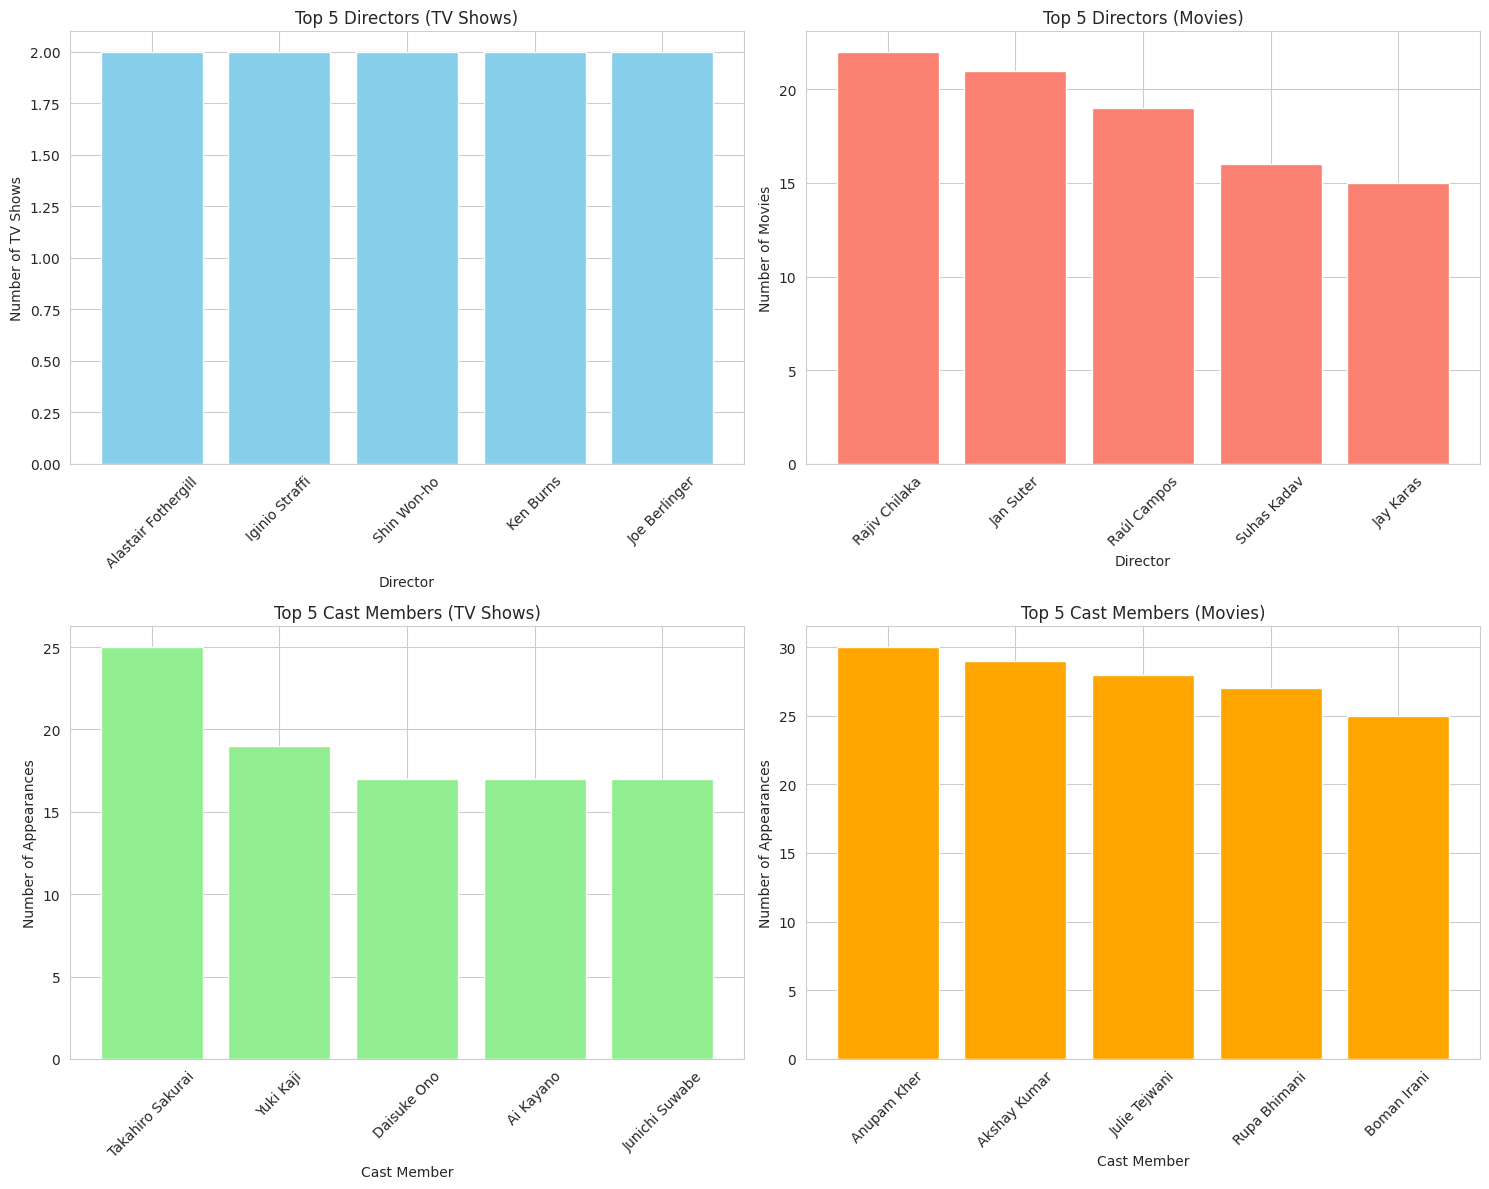

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# 1. Top 5 TV Directors
axes[0, 0].bar(
    tv_director_split["Director_List"].to_list(),
    tv_director_split["count"].to_list(),
    color='skyblue'
)
axes[0, 0].set_title('Top 5 Directors (TV Shows)')
axes[0, 0].set_xlabel('Director')
axes[0, 0].set_ylabel('Number of TV Shows')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Top 5 Movie Directors
axes[0, 1].bar(
    movie_director_split["Director_List"].to_list(),
    movie_director_split["count"].to_list(),
    color='salmon'
)
axes[0, 1].set_title('Top 5 Directors (Movies)')
axes[0, 1].set_xlabel('Director')
axes[0, 1].set_ylabel('Number of Movies')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Top 5 TV Cast Members
axes[1, 0].bar(
    tv_cast_split["Cast_List"].to_list(),
    tv_cast_split["count"].to_list(),
    color='lightgreen'
)
axes[1, 0].set_title('Top 5 Cast Members (TV Shows)')
axes[1, 0].set_xlabel('Cast Member')
axes[1, 0].set_ylabel('Number of Appearances')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Top 5 Movie Cast Members
axes[1, 1].bar(
    movie_cast_split["Cast_List"].to_list(),
    movie_cast_split["count"].to_list(),
    color='orange'
)
axes[1, 1].set_title('Top 5 Cast Members (Movies)')
axes[1, 1].set_xlabel('Cast Member')
axes[1, 1].set_ylabel('Number of Appearances')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
df.columns

['Show_ID',
 'Video_Type',
 'Title',
 'Director',
 'Cast',
 'Country',
 'Date_Added',
 'Year_Release',
 'Rating',
 'Duration',
 'Genres',
 'Description']

## **Relationship between Country, Year of Release, and Genre**

In [ ]:
data_3d = df.clone()

data_3d = data_3d.with_columns([
    pl.col('Country').str.split(', '),
    pl.col('Genres').str.split(', ')
])

data_3d = data_3d.explode('Country').explode('Genres')

data_3d_pd = data_3d.to_pandas()

fig = px.scatter_3d(
    data_3d_pd,
    x='Country',
    y='Year_Release',
    z='Genres',
    color='Video_Type',
    title='3D Scatter Plot of Country, Year of Release, and Genre'
)

fig.show()